In [ ]:
import pandas as pd
import glob
import os

path = r"C:/Users/jihun/OneDrive/바탕 화면/시뮬레이션 결과"
all_files = glob.glob(os.path.join(path, "run-*-log.csv"))


li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)


combined_df = pd.concat(li, axis=0, ignore_index=True)


output_file = os.path.join(path, "combined_results.csv")
combined_df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"파일 {len(all_files)}개가 성공적으로 합쳐져 '{output_file}'에 저장되었습니다.")

In [1]:
import pandas as pd
import os

# 1. 아까 저장했던 파일 경로
path = r"C:/Users/jihun/OneDrive/바탕 화면/시뮬레이션 결과"
output_file = os.path.join(path, "combined_results.csv") # (이전 코드에서 이어지는 경우)

# 2. 저장된 통합 CSV 파일을 'data'라는 새 DataFrame으로 불러옵니다.
data = pd.read_csv(output_file)


In [2]:
# 3. 'election' 값이 1에서 5 사이인 행들을 제거합니다.
mask = ~data['election'].between(1, 10)
removed_count = len(data) - mask.sum()
data = data[mask].reset_index(drop=True)

In [3]:
mask_elec11_n4 = (data['election'] == 11) & (data['n_parties'] == 4)
runs_with_4 = data.loc[mask_elec11_n4, 'run-number'].unique()
print(f"election 11에서 정당 4개인 run-number 수: {len(runs_with_4)}")

# 해당 run들의 전체 로그만 추출
data_elec11_n4 = data[data['run-number'].isin(runs_with_4)].reset_index(drop=True)

election 11에서 정당 4개인 run-number 수: 4755


In [4]:
# election 11에서 각 range에 대응하는 distinct party들이 모두 있는 runs 추출
ranges = [(32.27, 38.27), (4.59, 9.59), (35.57, 40.57), (10.53, 15.53)]

matched_runs_11 = []
matched_rows_11 = []

for run in runs_with_4:
    df_run = data[data['run-number'] == run]
    parties11 = df_run[(df_run['election'] == 11) & (df_run['event_type'] == 'party_status')][['who', 'vote_share']].dropna().copy()
    if parties11.empty:
        continue
    parties11['vote_pct'] = parties11['vote_share'] * 100

    used = set()
    ok = True
    for low, high in ranges:
        mask = parties11['vote_pct'].between(low, high) & ~parties11['who'].isin(used)
        if mask.any():
            used.add(parties11.loc[mask, 'who'].iloc[0])
        else:
            ok = False
            break

    if ok:
        matched_runs_11.append(run)
        matched_rows_11.append(parties11.assign(**{c: df_run.loc[parties11.index, c] for c in df_run.columns if c not in parties11.columns}))

# 결과 데이터프레임 (election==11의 party_status 행만 포함)
if matched_rows_11:
    matched_df_11 = pd.concat(matched_rows_11, ignore_index=True)
else:
    matched_df_11 = data_elec11_n4.iloc[0:0].copy()

print(f"Found {len(matched_runs_11)} runs:", matched_runs_11)
if not matched_df_11.empty:
    display_cols = ['run-number', 'election', 'event_type', 'who', 'rule', 'species', 'vote_share']
    out = matched_df_11[display_cols].copy()
    out['vote_share_pct'] = out['vote_share'] * 100
    print(out.sort_values(['run-number', 'vote_share_pct']).reset_index(drop=True))
else:
    print("No matched runs found for election 11.")

Found 6 runs: [np.int64(12771), np.int64(17102), np.int64(1726), np.int64(17540), np.int64(2283), np.int64(411)]
    run-number  election    event_type  who      rule species  vote_share  \
0          411        11  party_status  0.0   A00006d       A      0.0839   
1          411        11  party_status  2.0    E01508       E      0.1515   
2          411        11  party_status  1.0   S00010r       S      0.3673   
3          411        11  party_status  3.0    H03002       H      0.3973   
4         1726        11  party_status  1.0    P03002       P      0.0938   
5         1726        11  party_status  0.0    H01004       H      0.1469   
6         1726        11  party_status  2.0    P03002       P      0.3786   
7         1726        11  party_status  3.0    H02000       H      0.3807   
8         2283        11  party_status  0.0   S00010g       S      0.0734   
9         2283        11  party_status  2.0   A00002b       A      0.1520   
10        2283        11  party_status  

In [5]:
# election 11에서 각 range에 대응하는 distinct party들이 모두 있는 runs 추출
ranges = [(30.77, 40.77), (2.09, 10.09), (33.07, 43.07), (8.03, 18.03)]

matched_runs_11_1 = []
matched_rows_11_1 = []

for run in runs_with_4:
    df_run = data[data['run-number'] == run]
    parties11 = df_run[(df_run['election'] == 11) & (df_run['event_type'] == 'party_status')][['who', 'vote_share']].dropna().copy()
    if parties11.empty:
        continue
        continue
    parties11['vote_pct'] = parties11['vote_share'] * 100

    used = set()
    ok = True
    for low, high in ranges:
        mask = parties11['vote_pct'].between(low, high) & ~parties11['who'].isin(used)
        if mask.any():
            used.add(parties11.loc[mask, 'who'].iloc[0])
        else:
            ok = False
            break

    if ok:
        matched_runs_11_1.append(run)
        matched_rows_11_1.append(parties11.assign(**{c: df_run.loc[parties11.index, c] for c in df_run.columns if c not in parties11.columns}))

# 결과 데이터프레임 (election==11의 party_status 행만 포함)
if matched_rows_11_1:
    matched_df_11_1 = pd.concat(matched_rows_11_1, ignore_index=True)
else:
    matched_df_11_1 = data_elec11_n4.iloc[0:0].copy()

print(f"Found {len(matched_runs_11_1)} runs:", matched_runs_11_1)
if not matched_df_11_1.empty:
    display_cols = ['run-number', 'election', 'event_type', 'who', 'rule', 'species', 'vote_share']
    out = matched_df_11_1[display_cols].copy()
    out['vote_share_pct'] = out['vote_share'] * 100
    print(out.sort_values(['run-number', 'vote_share_pct']).reset_index(drop=True))
else:
    print("No matched runs found for election 11.")

Found 137 runs: [np.int64(10089), np.int64(10208), np.int64(10238), np.int64(10418), np.int64(10623), np.int64(10651), np.int64(10853), np.int64(11540), np.int64(11732), np.int64(12104), np.int64(1220), np.int64(12242), np.int64(12571), np.int64(12644), np.int64(12761), np.int64(12771), np.int64(12841), np.int64(12905), np.int64(13124), np.int64(13159), np.int64(13335), np.int64(13496), np.int64(13571), np.int64(13597), np.int64(13649), np.int64(13674), np.int64(13794), np.int64(13885), np.int64(13894), np.int64(14149), np.int64(14799), np.int64(14817), np.int64(15079), np.int64(15227), np.int64(15300), np.int64(15329), np.int64(15428), np.int64(1546), np.int64(15738), np.int64(15925), np.int64(15957), np.int64(16274), np.int64(16293), np.int64(16321), np.int64(16546), np.int64(16568), np.int64(16626), np.int64(16956), np.int64(16992), np.int64(17010), np.int64(17011), np.int64(17102), np.int64(17108), np.int64(1721), np.int64(1726), np.int64(17463), np.int64(17540), np.int64(1759), np

In [6]:
mask_elec12_n6 = (data['election'] == 12) & (data['n_parties'] == 6)
runs_with_6 = data.loc[mask_elec12_n6, 'run-number'].unique()
print(f"election 12에서 정당 6개인 run-number 수: {len(runs_with_6)}")

# 해당 run들의 전체 로그만 추출
data_elec12_n6 = data[data['run-number'].isin(runs_with_6)].reset_index(drop=True)

election 12에서 정당 6개인 run-number 수: 510


In [7]:
# election 12에서 각 range에 대응하는 distinct party들이 모두 있는 runs 추출
targets = [25.18, 37.48, 6.85, 5.68, 3.81, 13.18]
tol = 5
ranges = [(t - tol, t + tol) for t in targets]

matched_runs_12_1 = []
matched_rows_12_1 = []

for run in runs_with_6:
    df_run = data[data['run-number'] == run]
    parties12 = df_run[(df_run['election'] == 12) & (df_run['event_type'] == 'party_status')][['who', 'vote_share']].dropna().copy()
    if parties12.empty:
        continue
    parties12['vote_pct'] = parties12['vote_share'] * 100

    used = set()
    ok = True
    for low, high in ranges:
        mask = parties12['vote_pct'].between(low, high) & ~parties12['who'].isin(used)
        if mask.any():
            used.add(parties12.loc[mask, 'who'].iloc[0])
        else:
            ok = False
            break

    if ok:
        matched_runs_12_1.append(run)
        matched_rows_12_1.append(parties12.assign(**{c: df_run.loc[parties12.index, c] for c in df_run.columns if c not in parties12.columns}))

# 결과 데이터프레임 (election==12의 party_status 행만 포함)
if matched_rows_12_1:
    matched_df_12_1 = pd.concat(matched_rows_12_1, ignore_index=True)
else:
    matched_df_12_1 = data_elec12_n6.iloc[0:0].copy()

print(f"Found {len(matched_runs_12_1)} runs:", matched_runs_12_1)
if not matched_df_12_1.empty:
    display_cols = ['run-number', 'election', 'event_type', 'who', 'rule', 'species', 'vote_share']
    out = matched_df_12_1[display_cols].copy()
    out['vote_share_pct'] = out['vote_share'] * 100
    print(out.sort_values(['run-number', 'vote_share_pct']).reset_index(drop=True))
else:
    print("No matched runs found for election 12.")

Found 9 runs: [np.int64(10001), np.int64(13369), np.int64(14297), np.int64(16559), np.int64(3427), np.int64(4054), np.int64(5691), np.int64(7430), np.int64(9013)]
    run-number  election    event_type  who      rule species  vote_share  \
0         3427        12  party_status  4.0   S00010f       S      0.0357   
1         3427        12  party_status  0.0   A00008e       A      0.0728   
2         3427        12  party_status  2.0   A00004c       A      0.1138   
3         3427        12  party_status  1.0    H01506       H      0.1791   
4         3427        12  party_status  3.0    E01006       E      0.2508   
5         3427        12  party_status  5.0    E01006       E      0.3479   
6         4054        12  party_status  0.0    P00304       P      0.0646   
7         4054        12  party_status  4.0    E00308       E      0.0819   
8         4054        12  party_status  2.0   S00010i       S      0.0920   
9         4054        12  party_status  1.0    E01010       E      

In [8]:
mask_elec13_n4 = (data['election'] == 13) & (data['n_parties'] == 4)
runs_with_4 = data.loc[mask_elec13_n4, 'run-number'].unique()
print(f"election 13에서 정당 4개인 run-number 수: {len(runs_with_4)}")

# 해당 run들의 전체 로그만 추출
data_elec13_n4 = data[data['run-number'].isin(runs_with_4)].reset_index(drop=True)

election 13에서 정당 4개인 run-number 수: 5580


In [9]:
targets = [42.80, 36.45, 3.23, 10.30]
tol = 2.5
ranges = [(t - tol, t + tol) for t in targets]

matched_runs_13 = []
matched_rows_13 = []

for run in runs_with_4:
    df_run = data[data['run-number'] == run]
    parties13 = df_run[(df_run['election'] == 13) & (df_run['event_type'] == 'party_status')][['who', 'vote_share']].dropna().copy()
    if parties13.empty:
        continue
    parties13['vote_pct'] = parties13['vote_share'] * 100

    used = set()
    ok = True
    for low, high in ranges:
        mask = parties13['vote_pct'].between(low, high) & ~parties13['who'].isin(used)
        if mask.any():
            used.add(parties13.loc[mask, 'who'].iloc[0])
        else:
            ok = False
            break

    if ok:
        matched_runs_13.append(run)
        matched_rows_13.append(parties13.assign(**{c: df_run.loc[parties13.index, c] for c in df_run.columns if c not in parties13.columns}))

# 결과 데이터프레임 (election==12의 party_status 행만 포함)
if matched_rows_13:
    matched_df_13 = pd.concat(matched_rows_13, ignore_index=True)
else:
    matched_df_13 = data_elec13_n4.iloc[0:0].copy()

print(f"Found {len(matched_runs_13)} runs:", matched_runs_13)
if not matched_df_13.empty:
    display_cols = ['run-number', 'election', 'event_type', 'who', 'rule', 'species', 'vote_share']
    out = matched_df_13[display_cols].copy()
    out['vote_share_pct'] = out['vote_share'] * 100
    print(out.sort_values(['run-number', 'vote_share_pct']).reset_index(drop=True))
else:
    print("No matched runs found for election 13.")

Found 3 runs: [np.int64(15861), np.int64(3877), np.int64(8346)]
    run-number  election    event_type  who     rule species  vote_share  \
0         3877        13  party_status  1.0  A00008e       A      0.0556   
1         3877        13  party_status  2.0   H01006       H      0.1149   
2         3877        13  party_status  0.0  A00000a       A      0.3881   
3         3877        13  party_status  3.0  A00002b       A      0.4414   
4         8346        13  party_status  2.0   E00302       E      0.0440   
5         8346        13  party_status  3.0   H02002       H      0.1194   
6         8346        13  party_status  0.0   H01504       H      0.3869   
7         8346        13  party_status  1.0   H01010       H      0.4497   
8        15861        13  party_status  0.0  S00010u       S      0.0549   
9        15861        13  party_status  2.0  S00010c       S      0.1279   
10       15861        13  party_status  1.0   P01508       P      0.3701   
11       15861        13

In [10]:
targets = [42.80, 36.45, 3.23, 10.30]
tol = 5.0
ranges = [(t - tol, t + tol) for t in targets]

matched_runs_13_1 = []
matched_rows_13_1 = []

for run in runs_with_4:
    df_run = data[data['run-number'] == run]
    parties13 = df_run[(df_run['election'] == 13) & (df_run['event_type'] == 'party_status')][['who', 'vote_share']].dropna().copy()
    if parties13.empty:
        continue
    parties13['vote_pct'] = parties13['vote_share'] * 100

    used = set()
    ok = True
    for low, high in ranges:
        mask = parties13['vote_pct'].between(low, high) & ~parties13['who'].isin(used)
        if mask.any():
            used.add(parties13.loc[mask, 'who'].iloc[0])
        else:
            ok = False
            break

    if ok:
        matched_runs_13_1.append(run)
        matched_rows_13_1.append(parties13.assign(**{c: df_run.loc[parties13.index, c] for c in df_run.columns if c not in parties13.columns}))

# 결과 데이터프레임 (election==12의 party_status 행만 포함)
if matched_rows_13_1:
    matched_df_13_1 = pd.concat(matched_rows_13_1, ignore_index=True)
else:
    matched_df_13_1 = data_elec13_n4.iloc[0:0].copy()

print(f"Found {len(matched_runs_13_1)} runs:", matched_runs_13_1)
if not matched_df_13_1.empty:
    display_cols = ['run-number', 'election', 'event_type', 'who', 'rule', 'species', 'vote_share']
    out = matched_df_13_1[display_cols].copy()
    out['vote_share_pct'] = out['vote_share'] * 100
    print(out.sort_values(['run-number', 'vote_share_pct']).reset_index(drop=True))
else:
    print("No matched runs found for election 13.")

Found 129 runs: [np.int64(10137), np.int64(10152), np.int64(10180), np.int64(10289), np.int64(10623), np.int64(10859), np.int64(10906), np.int64(11068), np.int64(11394), np.int64(11492), np.int64(11540), np.int64(11584), np.int64(11607), np.int64(11613), np.int64(11734), np.int64(1178), np.int64(1220), np.int64(12284), np.int64(12421), np.int64(12457), np.int64(12486), np.int64(13090), np.int64(13116), np.int64(13132), np.int64(13159), np.int64(13384), np.int64(13393), np.int64(13446), np.int64(13597), np.int64(14605), np.int64(14825), np.int64(14836), np.int64(14891), np.int64(14951), np.int64(15006), np.int64(15096), np.int64(15300), np.int64(15307), np.int64(1550), np.int64(15515), np.int64(15542), np.int64(15689), np.int64(15861), np.int64(15942), np.int64(16128), np.int64(16158), np.int64(1616), np.int64(16321), np.int64(16467), np.int64(16627), np.int64(16985), np.int64(1714), np.int64(17222), np.int64(17308), np.int64(17369), np.int64(17408), np.int64(17418), np.int64(17822), np

In [11]:
mask_elec14_n4 = (data['election'] == 14) & (data['n_parties'] == 4)
runs_with_4 = data.loc[mask_elec13_n4, 'run-number'].unique()
print(f"election 14에서 정당 4개인 run-number 수: {len(runs_with_4)}")

# 해당 run들의 전체 로그만 추출
data_elec14_n4 = data[data['run-number'].isin(runs_with_4)].reset_index(drop=True)

election 14에서 정당 4개인 run-number 수: 5580


In [12]:
targets = [33.50, 25.54, 26.74, 7.23]
tol = 2.5
ranges = [(t - tol, t + tol) for t in targets]

matched_runs_14 = []
matched_rows_14 = []

for run in runs_with_4:
    df_run = data[data['run-number'] == run]
    parties14 = df_run[(df_run['election'] == 14) & (df_run['event_type'] == 'party_status')][['who', 'vote_share']].dropna().copy()
    if parties14.empty:
        continue
    parties14['vote_pct'] = parties14['vote_share'] * 100

    used = set()
    ok = True
    for low, high in ranges:
        mask = parties14['vote_pct'].between(low, high) & ~parties14['who'].isin(used)
        if mask.any():
            used.add(parties14.loc[mask, 'who'].iloc[0])
        else:
            ok = False
            break

    if ok:
        matched_runs_14.append(run)
        matched_rows_14.append(parties14.assign(**{c: df_run.loc[parties14.index, c] for c in df_run.columns if c not in parties14.columns}))

# 결과 데이터프레임 (election==12의 party_status 행만 포함)
if matched_rows_14:
    matched_df_14 = pd.concat(matched_rows_14, ignore_index=True)
else:
    matched_df_14 = data_elec14_n4.iloc[0:0].copy()

print(f"Found {len(matched_runs_14)} runs:", matched_runs_14)
if not matched_df_14.empty:
    display_cols = ['run-number', 'election', 'event_type', 'who', 'rule', 'species', 'vote_share']
    out = matched_df_14[display_cols].copy()
    out['vote_share_pct'] = out['vote_share'] * 100
    print(out.sort_values(['run-number', 'vote_share_pct']).reset_index(drop=True))
else:
    print("No matched runs found for election 14.")

Found 13 runs: [np.int64(10368), np.int64(10601), np.int64(13344), np.int64(1858), np.int64(2927), np.int64(4153), np.int64(5289), np.int64(5579), np.int64(563), np.int64(6735), np.int64(8052), np.int64(9347), np.int64(9409)]
    run-number  election    event_type  who      rule species  vote_share  \
0          563        14  party_status  0.0    E02010       E      0.0338   
1          563        14  party_status  4.0   A00000a       A      0.0932   
2          563        14  party_status  3.0   S00010k       S      0.2688   
3          563        14  party_status  1.0    E02006       E      0.2696   
4          563        14  party_status  2.0    P03002       P      0.3346   
5         1858        14  party_status  2.0    H04002       H      0.0474   
6         1858        14  party_status  3.0   S00010a       S      0.0676   
7         1858        14  party_status  0.0    H02004       H      0.2654   
8         1858        14  party_status  4.0   A00006d       A      0.2798   
9   

In [13]:
targets = [33.50, 25.54, 26.74, 7.23]
tol = 5.0
ranges = [(t - tol, t + tol) for t in targets]

matched_runs_14_1 = []
matched_rows_14_1 = []

for run in runs_with_4:
    df_run = data[data['run-number'] == run]
    parties14 = df_run[(df_run['election'] == 14) & (df_run['event_type'] == 'party_status')][['who', 'vote_share']].dropna().copy()
    if parties14.empty:
        continue
    parties14['vote_pct'] = parties14['vote_share'] * 100

    used = set()
    ok = True
    for low, high in ranges:
        mask = parties14['vote_pct'].between(low, high) & ~parties14['who'].isin(used)
        if mask.any():
            used.add(parties14.loc[mask, 'who'].iloc[0])
        else:
            ok = False
            break

    if ok:
        matched_runs_14_1.append(run)
        matched_rows_14_1.append(parties14.assign(**{c: df_run.loc[parties14.index, c] for c in df_run.columns if c not in parties14.columns}))

# 결과 데이터프레임 (election==12의 party_status 행만 포함)
if matched_rows_14_1:
    matched_df_14_1 = pd.concat(matched_rows_14_1, ignore_index=True)
else:
    matched_df_14_1 = data_elec14_n4.iloc[0:0].copy()

print(f"Found {len(matched_runs_14_1)} runs:", matched_runs_14_1)
if not matched_df_14_1.empty:
    display_cols = ['run-number', 'election', 'event_type', 'who', 'rule', 'species', 'vote_share']
    out = matched_df_14_1[display_cols].copy()
    out['vote_share_pct'] = out['vote_share'] * 100
    print(out.sort_values(['run-number', 'vote_share_pct']).reset_index(drop=True))
else:
    print("No matched runs found for election 14.")

Found 208 runs: [np.int64(10077), np.int64(10107), np.int64(1013), np.int64(10166), np.int64(10173), np.int64(10368), np.int64(10374), np.int64(10425), np.int64(10542), np.int64(10598), np.int64(10601), np.int64(10632), np.int64(10708), np.int64(1091), np.int64(10997), np.int64(10999), np.int64(11255), np.int64(11419), np.int64(11531), np.int64(1196), np.int64(12016), np.int64(12106), np.int64(1212), np.int64(12137), np.int64(12245), np.int64(12270), np.int64(12340), np.int64(12539), np.int64(12575), np.int64(12590), np.int64(12620), np.int64(12773), np.int64(12869), np.int64(12893), np.int64(12909), np.int64(12983), np.int64(1302), np.int64(13025), np.int64(13031), np.int64(13140), np.int64(13149), np.int64(13344), np.int64(13489), np.int64(13497), np.int64(13926), np.int64(13933), np.int64(14036), np.int64(14171), np.int64(14200), np.int64(14255), np.int64(14284), np.int64(14346), np.int64(14351), np.int64(14387), np.int64(1449), np.int64(14596), np.int64(14643), np.int64(1466), np.i

In [14]:
mask_elec15_n5 = (data['election'] == 15) & (data['n_parties'] == 5)
runs_with_5 = data.loc[mask_elec15_n5, 'run-number'].unique()
print(f"election 15에서 정당 5개인 run-number 수: {len(runs_with_5)}")

# 해당 run들의 전체 로그만 추출
data_elec15_n5 = data[data['run-number'].isin(runs_with_5)].reset_index(drop=True)

election 15에서 정당 5개인 run-number 수: 3188


In [15]:
targets = [33.84, 33.35, 9.67, 6.79, 5.42]
tol = 5
ranges = [(t - tol, t + tol) for t in targets]

matched_runs_15 = []
matched_rows_15 = []
    
for run in runs_with_5:
    df_run = data[data['run-number'] == run]
    parties15 = df_run[(df_run['election'] == 15) & (df_run['event_type'] == 'party_status')][['who', 'vote_share']].dropna().copy()
    if parties15.empty:
        continue
    parties15['vote_pct'] = parties15['vote_share'] * 100

    used = set()
    ok = True
    for low, high in ranges:
        mask = parties15['vote_pct'].between(low, high) & ~parties15['who'].isin(used)
        if mask.any():
            used.add(parties15.loc[mask, 'who'].iloc[0])
        else:
            ok = False
            break

    if ok:
        matched_runs_15.append(run)
        matched_rows_15.append(parties15.assign(**{c: df_run.loc[parties15.index, c] for c in df_run.columns if c not in parties15.columns}))

# 결과 데이터프레임 (election==12의 party_status 행만 포함)
if matched_rows_15:
    matched_df_15 = pd.concat(matched_rows_15, ignore_index=True)
else:
    matched_df_15 = data_elec15_n5.iloc[0:0].copy()

print(f"Found {len(matched_runs_15)} runs:", matched_runs_15)
if not matched_df_15.empty:
    display_cols = ['run-number', 'election', 'event_type', 'who', 'rule', 'species', 'vote_share']
    out = matched_df_15[display_cols].copy()
    out['vote_share_pct'] = out['vote_share'] * 100
    print(out.sort_values(['run-number', 'vote_share_pct']).reset_index(drop=True))
else:
    print("No matched runs found for election 15.")

Found 9 runs: [np.int64(10595), np.int64(10623), np.int64(13090), np.int64(13393), np.int64(155), np.int64(1630), np.int64(1888), np.int64(9303), np.int64(956)]
    run-number  election    event_type  who      rule species  vote_share  \
0          155        15  party_status  4.0    H00302       H      0.0497   
1          155        15  party_status  5.0  S00010ai       S      0.0966   
2          155        15  party_status  0.0    H01004       H      0.1385   
3          155        15  party_status  3.0    E01010       E      0.3556   
4          155        15  party_status  1.0    P01006       P      0.3596   
5          956        15  party_status  0.0    P04004       P      0.0961   
6          956        15  party_status  4.0    P01010       P      0.1002   
7          956        15  party_status  1.0   A00010f       A      0.1038   
8          956        15  party_status  2.0    P03008       P      0.3256   
9          956        15  party_status  3.0    H01500       H      0.

In [16]:
mask_elec16_n4 = (data['election'] == 16) & (data['n_parties'] == 4)
runs_with_4 = data.loc[mask_elec16_n4, 'run-number'].unique()
print(f"election 16에서 정당 4개인 run-number 수: {len(runs_with_4)}")

# 해당 run들의 전체 로그만 추출
data_elec16_n4 = data[data['run-number'].isin(runs_with_4)].reset_index(drop=True)

election 16에서 정당 4개인 run-number 수: 6130


In [17]:
targets = [36.67, 26.69, 24.25, 3.61]
tol = 5
ranges = [(t - tol, t + tol) for t in targets]

matched_runs_16 = []
matched_rows_16 = []

for run in runs_with_4:
    df_run = data[data['run-number'] == run]
    parties16 = df_run[(df_run['election'] == 16) & (df_run['event_type'] == 'party_status')][['who', 'vote_share']].dropna().copy()
    if parties16.empty:
        continue
    parties16['vote_pct'] = parties16['vote_share'] * 100

    used = set()
    ok = True
    for low, high in ranges:
        mask = parties16['vote_pct'].between(low, high) & ~parties16['who'].isin(used)
        if mask.any():
            used.add(parties16.loc[mask, 'who'].iloc[0])
        else:
            ok = False
            break

    if ok:
        matched_runs_16.append(run)
        matched_rows_16.append(parties16.assign(**{c: df_run.loc[parties16.index, c] for c in df_run.columns if c not in parties16.columns}))

# 결과 데이터프레임 (election==12의 party_status 행만 포함)
if matched_rows_16:
    matched_df_16 = pd.concat(matched_rows_16, ignore_index=True)
else:
    matched_df_16 = data_elec16_n4.iloc[0:0].copy()

print(f"Found {len(matched_runs_16)} runs:", matched_runs_16)
if not matched_df_16.empty:
    display_cols = ['run-number', 'election', 'event_type', 'who', 'rule', 'species', 'vote_share']
    out = matched_df_16[display_cols].copy()
    out['vote_share_pct'] = out['vote_share'] * 100
    print(out.sort_values(['run-number', 'vote_share_pct']).reset_index(drop=True))
else:
    print("No matched runs found for election 16.")

Found 124 runs: [np.int64(1001), np.int64(10050), np.int64(1018), np.int64(10196), np.int64(10283), np.int64(10399), np.int64(10404), np.int64(10523), np.int64(10525), np.int64(1056), np.int64(10602), np.int64(10628), np.int64(10933), np.int64(11180), np.int64(11221), np.int64(11326), np.int64(11409), np.int64(11453), np.int64(11460), np.int64(11710), np.int64(1196), np.int64(1221), np.int64(12223), np.int64(12375), np.int64(12397), np.int64(1256), np.int64(12639), np.int64(12646), np.int64(12808), np.int64(12830), np.int64(12832), np.int64(12991), np.int64(13095), np.int64(1326), np.int64(13422), np.int64(13588), np.int64(13683), np.int64(13953), np.int64(14068), np.int64(14131), np.int64(14171), np.int64(14207), np.int64(14273), np.int64(14309), np.int64(14407), np.int64(14643), np.int64(1466), np.int64(15375), np.int64(15794), np.int64(16108), np.int64(16187), np.int64(16364), np.int64(16413), np.int64(16419), np.int64(16624), np.int64(16634), np.int64(1678), np.int64(1680), np.int6

In [18]:
# 각 run-number(시뮬) 별로 vote_share 내림차순 정렬하여 인덱스 리셋
matched_df_11_1 = matched_df_11_1.sort_values(['run-number', 'vote_share'], ascending=[True, False]).reset_index(drop=True)
matched_df_12_1 = matched_df_12_1.sort_values(['run-number', 'vote_share'], ascending=[True, False]).reset_index(drop=True)
matched_df_13_1 = matched_df_13_1.sort_values(['run-number', 'vote_share'], ascending=[True, False]).reset_index(drop=True)
matched_df_14_1 = matched_df_14_1.sort_values(['run-number', 'vote_share'], ascending=[True, False]).reset_index(drop=True)
matched_df_15 = matched_df_15.sort_values(['run-number', 'vote_share'], ascending=[True, False]).reset_index(drop=True)
matched_df_16 = matched_df_16.sort_values(['run-number', 'vote_share'], ascending=[True, False]).reset_index(drop=True)

In [19]:
# matched_df_11_1의 'rule'에서 첫 글자를 'Party Rule' 열로 추출
matched_df_11_1['Party Rule'] = matched_df_11_1['rule'].str[0]
matched_df_12_1['Party Rule'] = matched_df_12_1['rule'].str[0]
matched_df_13_1['Party Rule'] = matched_df_13_1['rule'].str[0]
matched_df_14_1['Party Rule'] = matched_df_14_1['rule'].str[0]
matched_df_15['Party Rule'] = matched_df_15['rule'].str[0]
matched_df_16['Party Rule'] = matched_df_16['rule'].str[0]

In [20]:
# rank 부여(각 run 내에서 vote_share 내림차순)
df = matched_df_11_1.copy()
df = df.sort_values(['run-number', 'vote_share'], ascending=[True, False])
df['rank'] = df.groupby('run-number').cumcount() + 1

# rank별 Party Rule 분포(개수)
pivot_counts = df.pivot_table(index='rank', columns='Party Rule', values='who', aggfunc='count', fill_value=0)
print("Rank별 Party Rule 분포 (counts):")
print(pivot_counts)

# rank별 Party Rule 분포(비율)
pivot_pct = pivot_counts.div(pivot_counts.sum(axis=1), axis=0).fillna(0) * 100
print("\nRank별 Party Rule 분포 (percent %):")
print(pivot_pct.round(2))

# rank=1(최고 득표)의 Party Rule 분포 요약
top1 = df[df['rank'] == 1]['Party Rule'].value_counts()
top1_pct = df[df['rank'] == 1]['Party Rule'].value_counts(normalize=True) * 100
print("\nTop-1 Party Rule counts:")
print(top1)
print("\nTop-1 Party Rule percent:")
print(top1_pct.round(2))

# run별 Party Rule 순서를 튜플로 만들어서 전체 run에서 동일한 순서의 빈도 집계
sequences = df.sort_values(['run-number', 'rank']).groupby('run-number')['Party Rule'].apply(tuple)
seq_counts = sequences.value_counts().rename_axis('sequence').reset_index(name='count')
print("\n가장 많이 등장하는 Party Rule 순서(상위 20):")
print(seq_counts.head(20))


Rank별 Party Rule 분포 (counts):
Party Rule   A   E   H   P   S
rank                          
1           21  25  42  30  19
2           37  26  27  26  21
3           19  26  28  31  33
4           27  20  19  29  42

Rank별 Party Rule 분포 (percent %):
Party Rule      A      E      H      P      S
rank                                         
1           15.33  18.25  30.66  21.90  13.87
2           27.01  18.98  19.71  18.98  15.33
3           13.87  18.98  20.44  22.63  24.09
4           19.71  14.60  13.87  21.17  30.66

Top-1 Party Rule counts:
Party Rule
H    42
P    30
E    25
A    21
S    19
Name: count, dtype: int64

Top-1 Party Rule percent:
Party Rule
H    30.66
P    21.90
E    18.25
A    15.33
S    13.87
Name: proportion, dtype: float64

가장 많이 등장하는 Party Rule 순서(상위 20):
        sequence  count
0   (H, A, P, S)      3
1   (H, S, E, A)      2
2   (H, A, E, H)      2
3   (H, S, H, E)      2
4   (H, P, A, S)      2
5   (E, H, E, A)      2
6   (H, E, P, P)      2
7   (P, P, H, P)   

In [21]:
# rank 부여(각 run 내에서 vote_share 내림차순)
df_12 = matched_df_12_1.copy()
df_12 = df_12.sort_values(['run-number', 'vote_share'], ascending=[True, False])
df_12['rank'] = df_12.groupby('run-number').cumcount() + 1

# rank별 Party Rule 분포(개수)
pivot_counts = df_12.pivot_table(index='rank', columns='Party Rule', values='who', aggfunc='count', fill_value=0)
print("Rank별 Party Rule 분포 (counts):")
print(pivot_counts)

# rank별 Party Rule 분포(비율)
pivot_pct = pivot_counts.div(pivot_counts.sum(axis=1), axis=0).fillna(0) * 100
print("\nRank별 Party Rule 분포 (percent %):")
print(pivot_pct.round(2))

# rank=1(최고 득표)의 Party Rule 분포 요약
top1 = df_12[df_12['rank'] == 1]['Party Rule'].value_counts()
top1_pct = df_12[df_12['rank'] == 1]['Party Rule'].value_counts(normalize=True) * 100
print("\nTop-1 Party Rule counts:")
print(top1)
print("\nTop-1 Party Rule percent:")
print(top1_pct.round(2))

# run별 Party Rule 순서를 튜플로 만들어서 전체 run에서 동일한 순서의 빈도 집계
sequences = df_12.sort_values(['run-number', 'rank']).groupby('run-number')['Party Rule'].apply(tuple)
seq_counts = sequences.value_counts().rename_axis('sequence').reset_index(name='count')
print("\n가장 많이 등장하는 Party Rule 순서(상위 20):")
print(seq_counts.head(20))


Rank별 Party Rule 분포 (counts):
Party Rule  A  E  H  P  S
rank                     
1           2  2  3  1  1
2           2  2  2  2  1
3           1  1  5  2  0
4           4  1  0  0  4
5           1  4  2  1  1
6           2  0  2  2  3

Rank별 Party Rule 분포 (percent %):
Party Rule      A      E      H      P      S
rank                                         
1           22.22  22.22  33.33  11.11  11.11
2           22.22  22.22  22.22  22.22  11.11
3           11.11  11.11  55.56  22.22   0.00
4           44.44  11.11   0.00   0.00  44.44
5           11.11  44.44  22.22  11.11  11.11
6           22.22   0.00  22.22  22.22  33.33

Top-1 Party Rule counts:
Party Rule
H    3
E    2
A    2
P    1
S    1
Name: count, dtype: int64

Top-1 Party Rule percent:
Party Rule
H    33.33
E    22.22
A    22.22
P    11.11
S    11.11
Name: proportion, dtype: float64

가장 많이 등장하는 Party Rule 순서(상위 20):
             sequence  count
0  (E, E, H, A, A, S)      1
1  (P, S, E, S, E, P)      1
2  (H, P, P, S,

In [22]:
# rank 부여(각 run 내에서 vote_share 내림차순)
df_13 = matched_df_13_1.copy()
df_13 = df_13.sort_values(['run-number', 'vote_share'], ascending=[True, False])
df_13['rank'] = df_13.groupby('run-number').cumcount() + 1

# rank별 Party Rule 분포(개수)
pivot_counts = df_13.pivot_table(index='rank', columns='Party Rule', values='who', aggfunc='count', fill_value=0)
print("Rank별 Party Rule 분포 (counts):")
print(pivot_counts)

# rank별 Party Rule 분포(비율)
pivot_pct = pivot_counts.div(pivot_counts.sum(axis=1), axis=0).fillna(0) * 100
print("\nRank별 Party Rule 분포 (percent %):")
print(pivot_pct.round(2))

# rank=1(최고 득표)의 Party Rule 분포 요약
top1 = df_13[df_13['rank'] == 1]['Party Rule'].value_counts()
top1_pct = df_13[df_13['rank'] == 1]['Party Rule'].value_counts(normalize=True) * 100
print("\nTop-1 Party Rule counts:")
print(top1)
print("\nTop-1 Party Rule percent:")
print(top1_pct.round(2))

# run별 Party Rule 순서를 튜플로 만들어서 전체 run에서 동일한 순서의 빈도 집계
sequences = df_13.sort_values(['run-number', 'rank']).groupby('run-number')['Party Rule'].apply(tuple)
seq_counts = sequences.value_counts().rename_axis('sequence').reset_index(name='count')
print("\n가장 많이 등장하는 Party Rule 순서(상위 20):")
print(seq_counts.head(20))


Rank별 Party Rule 분포 (counts):
Party Rule   A   E   H   P   S
rank                          
1           26  30  33  21  19
2           34  31  22  24  18
3           26  30  26  20  27
4           23  16  18  25  47

Rank별 Party Rule 분포 (percent %):
Party Rule      A      E      H      P      S
rank                                         
1           20.16  23.26  25.58  16.28  14.73
2           26.36  24.03  17.05  18.60  13.95
3           20.16  23.26  20.16  15.50  20.93
4           17.83  12.40  13.95  19.38  36.43

Top-1 Party Rule counts:
Party Rule
H    33
E    30
A    26
P    21
S    19
Name: count, dtype: int64

Top-1 Party Rule percent:
Party Rule
H    25.58
E    23.26
A    20.16
P    16.28
S    14.73
Name: proportion, dtype: float64

가장 많이 등장하는 Party Rule 순서(상위 20):
        sequence  count
0   (H, A, A, E)      2
1   (P, A, P, S)      2
2   (S, A, E, S)      2
3   (A, E, E, S)      2
4   (A, S, P, S)      2
5   (E, A, A, S)      2
6   (E, P, E, S)      2
7   (P, S, A, S)   

In [23]:
# rank 부여(각 run 내에서 vote_share 내림차순)
df_14 = matched_df_14_1.copy()
df_14 = df_14.sort_values(['run-number', 'vote_share'], ascending=[True, False])
df_14['rank'] = df_14.groupby('run-number').cumcount() + 1

# rank별 Party Rule 분포(개수)
pivot_counts = df_14.pivot_table(index='rank', columns='Party Rule', values='who', aggfunc='count', fill_value=0)
print("Rank별 Party Rule 분포 (counts):")
print(pivot_counts)

# rank별 Party Rule 분포(비율)
pivot_pct = pivot_counts.div(pivot_counts.sum(axis=1), axis=0).fillna(0) * 100
print("\nRank별 Party Rule 분포 (percent %):")
print(pivot_pct.round(2))

# rank=1(최고 득표)의 Party Rule 분포 요약
top1 = df_14[df_14['rank'] == 1]['Party Rule'].value_counts()
top1_pct = df_14[df_14['rank'] == 1]['Party Rule'].value_counts(normalize=True) * 100
print("\nTop-1 Party Rule counts:")
print(top1)
print("\nTop-1 Party Rule percent:")
print(top1_pct.round(2))

# run별 Party Rule 순서를 튜플로 만들어서 전체 run에서 동일한 순서의 빈도 집계
sequences = df_14.sort_values(['run-number', 'rank']).groupby('run-number')['Party Rule'].apply(tuple)
seq_counts = sequences.value_counts().rename_axis('sequence').reset_index(name='count')
print("\n가장 많이 등장하는 Party Rule 순서(상위 20):")
print(seq_counts.head(20))

Rank별 Party Rule 분포 (counts):
Party Rule   A   E   H   P   S
rank                          
1           47  52  43  36  30
2           53  50  37  37  31
3           36  37  43  46  46
4           40  36  52  35  45
5           12  11  13  13  10

Rank별 Party Rule 분포 (percent %):
Party Rule      A      E      H      P      S
rank                                         
1           22.60  25.00  20.67  17.31  14.42
2           25.48  24.04  17.79  17.79  14.90
3           17.31  17.79  20.67  22.12  22.12
4           19.23  17.31  25.00  16.83  21.63
5           20.34  18.64  22.03  22.03  16.95

Top-1 Party Rule counts:
Party Rule
E    52
A    47
H    43
P    36
S    30
Name: count, dtype: int64

Top-1 Party Rule percent:
Party Rule
E    25.00
A    22.60
H    20.67
P    17.31
S    14.42
Name: proportion, dtype: float64

가장 많이 등장하는 Party Rule 순서(상위 20):
           sequence  count
0      (A, E, A, P)      2
1      (A, E, H, P)      2
2      (E, P, H, H)      2
3      (A, P, H, H)      2

In [24]:
# rank 부여(각 run 내에서 vote_share 내림차순)
df_15 = matched_df_15.copy()
df_15 = df_15.sort_values(['run-number', 'vote_share'], ascending=[True, False])
df_15['rank'] = df_15.groupby('run-number').cumcount() + 1

# rank별 Party Rule 분포(개수)
pivot_counts = df_15.pivot_table(index='rank', columns='Party Rule', values='who', aggfunc='count', fill_value=0)
print("Rank별 Party Rule 분포 (counts):")
print(pivot_counts)

# rank별 Party Rule 분포(비율)
pivot_pct = pivot_counts.div(pivot_counts.sum(axis=1), axis=0).fillna(0) * 100
print("\nRank별 Party Rule 분포 (percent %):")
print(pivot_pct.round(2))

# rank=1(최고 득표)의 Party Rule 분포 요약
top1 = df_15[df_15['rank'] == 1]['Party Rule'].value_counts()
top1_pct = df_15[df_15['rank'] == 1]['Party Rule'].value_counts(normalize=True) * 100
print("\nTop-1 Party Rule counts:")
print(top1)
print("\nTop-1 Party Rule percent:")
print(top1_pct.round(2))

# run별 Party Rule 순서를 튜플로 만들어서 전체 run에서 동일한 순서의 빈도 집계
sequences = df_15.sort_values(['run-number', 'rank']).groupby('run-number')['Party Rule'].apply(tuple)
seq_counts = sequences.value_counts().rename_axis('sequence').reset_index(name='count')
print("\n가장 많이 등장하는 Party Rule 순서(상위 20):")
print(seq_counts.head(20))

Rank별 Party Rule 분포 (counts):
Party Rule  A  E  H  P  S
rank                     
1           2  0  4  3  0
2           2  3  1  3  0
3           1  2  3  1  2
4           1  1  1  2  4
5           1  1  1  3  3

Rank별 Party Rule 분포 (percent %):
Party Rule      A      E      H      P      S
rank                                         
1           22.22   0.00  44.44  33.33   0.00
2           22.22  33.33  11.11  33.33   0.00
3           11.11  22.22  33.33  11.11  22.22
4           11.11  11.11  11.11  22.22  44.44
5           11.11  11.11  11.11  33.33  33.33

Top-1 Party Rule counts:
Party Rule
H    4
P    3
A    2
Name: count, dtype: int64

Top-1 Party Rule percent:
Party Rule
H    44.44
P    33.33
A    22.22
Name: proportion, dtype: float64

가장 많이 등장하는 Party Rule 순서(상위 20):
          sequence  count
0  (P, E, H, S, H)      1
1  (H, P, A, P, P)      1
2  (A, P, S, E, P)      1
3  (A, P, H, S, E)      1
4  (H, H, E, A, A)      1
5  (H, A, P, S, S)      1
6  (P, A, H, S, P)      1
7 

In [25]:
# rank 부여(각 run 내에서 vote_share 내림차순)
df_16 = matched_df_16.copy()
df_16 = df_16.sort_values(['run-number', 'vote_share'], ascending=[True, False])
df_16['rank'] = df_16.groupby('run-number').cumcount() + 1

# rank별 Party Rule 분포(개수)
pivot_counts = df_16.pivot_table(index='rank', columns='Party Rule', values='who', aggfunc='count', fill_value=0)
print("Rank별 Party Rule 분포 (counts):")
print(pivot_counts)

# rank별 Party Rule 분포(비율)
pivot_pct = pivot_counts.div(pivot_counts.sum(axis=1), axis=0).fillna(0) * 100
print("\nRank별 Party Rule 분포 (percent %):")
print(pivot_pct.round(2))

# rank=1(최고 득표)의 Party Rule 분포 요약
top1 = df_16[df_16['rank'] == 1]['Party Rule'].value_counts()
top1_pct = df_16[df_16['rank'] == 1]['Party Rule'].value_counts(normalize=True) * 100
print("\nTop-1 Party Rule counts:")
print(top1)
print("\nTop-1 Party Rule percent:")
print(top1_pct.round(2))

# run별 Party Rule 순서를 튜플로 만들어서 전체 run에서 동일한 순서의 빈도 집계
sequences = df_16.sort_values(['run-number', 'rank']).groupby('run-number')['Party Rule'].apply(tuple)
seq_counts = sequences.value_counts().rename_axis('sequence').reset_index(name='count')
print("\n가장 많이 등장하는 Party Rule 순서(상위 20):")
print(seq_counts.head(20))

Rank별 Party Rule 분포 (counts):
Party Rule   A   E   H   P   S
rank                          
1           33  24  25  23  19
2           18  36  29  20  21
3           19  30  21  20  34
4           25  14  11  25  49

Rank별 Party Rule 분포 (percent %):
Party Rule      A      E      H      P      S
rank                                         
1           26.61  19.35  20.16  18.55  15.32
2           14.52  29.03  23.39  16.13  16.94
3           15.32  24.19  16.94  16.13  27.42
4           20.16  11.29   8.87  20.16  39.52

Top-1 Party Rule counts:
Party Rule
A    33
H    25
E    24
P    23
S    19
Name: count, dtype: int64

Top-1 Party Rule percent:
Party Rule
A    26.61
H    20.16
E    19.35
P    18.55
S    15.32
Name: proportion, dtype: float64

가장 많이 등장하는 Party Rule 순서(상위 20):
        sequence  count
0   (S, E, E, S)      3
1   (H, S, S, P)      2
2   (H, E, A, S)      2
3   (H, E, P, E)      2
4   (A, H, S, S)      2
5   (P, A, H, S)      2
6   (A, S, E, E)      2
7   (A, E, P, S)   

In [26]:

# rank 값들에 대해 df_rank_{rank} 변수와 딕셔너리 df_rank_dict 생성
ranks = sorted(df['rank'].unique())
df_rank_dict = {}
for r in ranks:
    df_rank = df[df['rank'] == r].reset_index(drop=True).copy()
    df_rank_dict[r] = df_rank
    globals()[f"df_rank_{r}"] = df_rank  # 노트북 전역에 df_rank_1, df_rank_2 ... 생성

# 간단한 요약 출력
print(f"생성된 데이터프레임 수: {len(ranks)}")
print("각 데이터프레임 행 수:")
for r in ranks:
    print(f"  df_rank_{r}: {len(df_rank_dict[r])} rows")

생성된 데이터프레임 수: 4
각 데이터프레임 행 수:
  df_rank_1: 137 rows
  df_rank_2: 137 rows
  df_rank_3: 137 rows
  df_rank_4: 137 rows


In [27]:

# rank 값들에 대해 df_rank_{rank} 변수와 딕셔너리 df_rank_dict 생성
ranks = sorted(df_12['rank'].unique())
df_12_rank_dict = {}
for r in ranks:
    df_12_rank = df_12[df_12['rank'] == r].reset_index(drop=True).copy()
    df_12_rank_dict[r] = df_12_rank
    globals()[f"df_12_rank_{r}"] = df_12_rank  # 노트북 전역에 df_12_rank_1, df_12_rank_2 ... 생성

# 간단한 요약 출력
print(f"생성된 데이터프레임 수: {len(ranks)}")
print("각 데이터프레임 행 수:")
for r in ranks:
    print(f"  df_12_rank_{r}: {len(df_12_rank_dict[r])} rows")

생성된 데이터프레임 수: 6
각 데이터프레임 행 수:
  df_12_rank_1: 9 rows
  df_12_rank_2: 9 rows
  df_12_rank_3: 9 rows
  df_12_rank_4: 9 rows
  df_12_rank_5: 9 rows
  df_12_rank_6: 9 rows


In [28]:
# df_13, df_14, df_15, df_16에 대해 rank별 데이터프레임과 딕셔너리 생성
for base_name in ('df_13', 'df_14', 'df_15', 'df_16'):
    df_var = globals().get(base_name)
    if df_var is None:
        print(f"{base_name}이(가) 정의되어 있지 않습니다. 건너뜁니다.")
        continue

    ranks = sorted(df_var['rank'].unique())
    rank_dict = {}
    for r in ranks:
        df_rank = df_var[df_var['rank'] == r].reset_index(drop=True).copy()
        rank_dict[r] = df_rank
        globals()[f"{base_name}_rank_{r}"] = df_rank  # ex: df_13_rank_1, df_13_rank_2 ...

    globals()[f"{base_name}_rank_dict"] = rank_dict  # ex: df_13_rank_dict

    # 간단한 요약 출력
    print(f"{base_name}: 생성된 데이터프레임 수: {len(ranks)}")
    for r in ranks:
        print(f"  {base_name}_rank_{r}: {len(rank_dict[r])} rows")

df_13: 생성된 데이터프레임 수: 4
  df_13_rank_1: 129 rows
  df_13_rank_2: 129 rows
  df_13_rank_3: 129 rows
  df_13_rank_4: 129 rows
df_14: 생성된 데이터프레임 수: 5
  df_14_rank_1: 208 rows
  df_14_rank_2: 208 rows
  df_14_rank_3: 208 rows
  df_14_rank_4: 208 rows
  df_14_rank_5: 59 rows
df_15: 생성된 데이터프레임 수: 5
  df_15_rank_1: 9 rows
  df_15_rank_2: 9 rows
  df_15_rank_3: 9 rows
  df_15_rank_4: 9 rows
  df_15_rank_5: 9 rows
df_16: 생성된 데이터프레임 수: 4
  df_16_rank_1: 124 rows
  df_16_rank_2: 124 rows
  df_16_rank_3: 124 rows
  df_16_rank_4: 124 rows


In [29]:
import builtins


valence_map = [
    # valence 0.3
    (0, 999, 0.3, 100),
    (3000, 3999, 0.3, 200),
    (6000, 6999, 0.3, 300),
    (9000, 9999, 0.3, 100),
    (12000, 12999, 0.3, 200),
    (15000, 15999, 0.3, 300),
    # valence 0.5
    (1000, 1999, 0.5, 100),
    (4000, 4999, 0.5, 200),
    (7000, 7999, 0.5, 300),
    (10000, 10999, 0.5, 100),
    (13000, 13999, 0.5, 200),
    (16000, 16999, 0.5, 300),
    # valence 0.7
    (2000, 2999, 0.7, 100),
    (5000, 5999, 0.7, 200),
    (8000, 8999, 0.7, 300),
    (11000, 11999, 0.7, 100),
    (14000, 14999, 0.7, 200),
    (17000, 17999, 0.7, 300),
]

# Build a one-shot replacement for globals() so the subsequent loop will only
# iterate df_rank_* and df_12_rank_* variables. After the first call we restore
# the original globals() so the rest of the notebook behaves normally.
_orig_builtins_globals = builtins.globals

class GlobalsProxy(dict):
    def __init__(self, names, real_getter):
        self._names = list(names)
        self._real_getter = real_getter

    def items(self):
        g = self._real_getter()
        for k in list(self._names):
            if k in g:
                yield (k, g[k])

    def __iter__(self):
        for k, _ in self.items():
            yield k

    def keys(self):
        return [k for k, _ in self.items()]

    def values(self):
        return [v for _, v in self.items()]

    def __getitem__(self, k):
        return self._real_getter()[k]

    def __setitem__(self, k, v):
        # write into real globals
        self._real_getter()[k] = v

    def get(self, k, default=None):
        return self._real_getter().get(k, default)

    def __contains__(self, k):
        return k in self._real_getter() and k in self._names

    def __len__(self):
        return sum(1 for _ in self.items())

class OneShotGlobals:
    def __init__(self, prefixes, real_globals_func):
        self.prefixes = tuple(prefixes)
        self.real = real_globals_func

    def __call__(self):
        real_dict = self.real()
        names = [n for n in real_dict.keys() if any(n.startswith(p) for p in self.prefixes)]
        proxy = GlobalsProxy(names, self.real)
        # restore the original globals() so subsequent calls behave normally
        builtins.globals = self.real
        return proxy

# set builtins.globals to our one-shot proxy so the loop below only sees desired vars
builtins.globals = OneShotGlobals(('df_rank_', 'df_12_rank_','df_13_rank_', 'df_14_rank_', 'df_15_rank_', 'df_16_rank_'), _orig_builtins_globals)

def _lookup_valence_and_ticks(run):
    try:
        r = int(run)
    except Exception:
        return (float("nan"), None)
    for start, end, val, ticks in valence_map:
        if start <= r <= end:
            return (val, ticks)
    return (float("nan"), None)

def assign_to_df(df):
    if 'run-number' not in df.columns:
        return df
    vals = df['run-number'].apply(lambda x: _lookup_valence_and_ticks(x))
    df = df.copy()
    df['valence_lambda'] = vals.apply(lambda t: t[0])
    df['campaign_ticks'] = vals.apply(lambda t: t[1])
    return df

# 전역 namespace의 모든 DataFrame에 적용
_updated = []

for name, obj in list(globals().items()):
    # 1) 직접 pandas.DataFrame: only process if it has 'run-number'
    if isinstance(obj, pd.DataFrame):
        if 'run-number' in obj.columns:
            globals()[name] = assign_to_df(obj)
            _updated.append(name)
        continue

    # 2) lists that may contain DataFrames (e.g., matched_rows_* lists)
    if isinstance(obj, list):
        changed = False
        for i, el in enumerate(obj):
            if isinstance(el, pd.DataFrame) and 'run-number' in el.columns:
                obj[i] = assign_to_df(el)
                changed = True
        if changed:
            globals()[name] = obj
            _updated.append(name)

# 요약 출력 (안전하게 컬럼이 없을 경우 예외 처리)
print(f"Updated {_updated.__len__()} objects (DataFrame or lists of DataFrames) with 'valence_lambda' and 'campaign_ticks'.")
print("Examples (variable: unique valence_lambda values):")
for n in _updated[:30]:
    val = globals().get(n)
    uniq_vals = []
    if isinstance(val, pd.DataFrame):
        if 'valence_lambda' in val.columns:
            uniq_vals = list(val['valence_lambda'].dropna().unique())[:5]
    elif isinstance(val, list):
        vals_set = set()
        for el in val:
            if isinstance(el, pd.DataFrame) and 'valence_lambda' in el.columns:
                vals_set.update(el['valence_lambda'].dropna().unique().tolist())
        uniq_vals = list(vals_set)[:5]
    print(f"  {n}: {uniq_vals}")

Updated 28 objects (DataFrame or lists of DataFrames) with 'valence_lambda' and 'campaign_ticks'.
Examples (variable: unique valence_lambda values):
  df_rank_1: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_rank_2: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_rank_3: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_rank_4: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_12_rank_1: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_12_rank_2: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_12_rank_3: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_12_rank_4: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_12_rank_5: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_12_rank_6: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_13_rank_1: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_13_rank_2: [np.float64(0.3), np.float64(0.5), np.float64(0.7)]
  df_13_rank_3: [np.float64(0.3), np.float64(0.

In [30]:
for r in (1, 2, 3, 4):
    df_name = f"df_rank_{r}"
    df = globals().get(df_name)
    if df is None:
        print(f"{df_name}이(가) 없습니다. 건너뜁니다.")
        continue

    print(f"\n=== Summary for {df_name} (rank={r}) ===")
    # 가능한 vote percent 컬럼 결정 (원본 df를 건드리지 않도록 복사)
    d = df.copy()
    if 'vote_pct' in d.columns:
        vote_col = 'vote_pct'
    elif 'vote_share_pct' in d.columns:
        vote_col = 'vote_share_pct'
    elif 'vote_share' in d.columns:
        d['vote_share_pct'] = d['vote_share'] * 100
        vote_col = 'vote_share_pct'
    else:
        vote_col = None

    cols_to_check = [vote_col, 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']
    cols = [c for c in cols_to_check if c and c in d.columns]

    print("사용된 컬럼:", cols)
    if cols:
        stats = d[cols].agg(['mean', 'std']).T
        print("\n평균 및 표준편차:")
        print(stats.round(4))
    else:
        print("요청한 수치 컬럼이 없습니다.")

    # species 통계
    if 'species' in d.columns:
        sp_counts = d['species'].value_counts()
        sp_pct = d['species'].value_counts(normalize=True) * 100
        sp_summary = pd.concat([sp_counts, sp_pct.round(2)], axis=1)
        sp_summary.columns = ['count', 'percent']
        print("\nSpecies 분포:")
        print(sp_summary)
    else:
        print("\n'species' 컬럼이 없습니다.")


=== Summary for df_rank_1 (rank=1) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean      std
vote_pct          40.7728   1.5294
phi                0.5620   0.3730
xcor               0.6855   5.9777
ycor              -0.1159   6.1444
fitness            0.4108   0.0503
ideal_point_loss  -0.6491   0.7057
valence           60.7664  17.3617
age                6.8613   3.0683

Species 분포:
         count  percent
species                
H           42    30.66
P           30    21.90
E           25    18.25
A           21    15.33
S           19    13.87

=== Summary for df_rank_2 (rank=2) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean      std
vote_pct          36.6326   2.4025
phi                0.5401   0.3633
xcor              -0.5345   6.6643
ycor               0.1567   6.2133
fitness            0.3750   0.0556
idea

In [31]:
# 통계(평균, 표준편차) 계산 (가능하면 기존 df_rank_1 사용, 없으면 df에서 rank==1으로 생성)
cols = [
    'voter-misery',
    'mean_eccentricity',
    'mean_party_policy_loss',
    'mean_party_policy_shift',
    'param_x_mean1', 'param_y_mean1', 'param_sd_1',
    'param_x_mean2', 'param_y_mean2', 'param_sd_2',
    'valence_lambda', 'campaign_ticks'
]

# source_df 결정
source_df = None
if 'df_rank_1' in globals():
    source_df = globals()['df_rank_1']
else:
    if 'df' in globals() and hasattr(globals()['df'], 'columns') and 'rank' in globals()['df'].columns:
        source_df = globals()['df'][globals()['df']['rank'] == 1].reset_index(drop=True).copy()
        globals()['df_rank_1'] = source_df
    else:
        for candidate in ('df_13', 'df_14', 'df_15', 'df_16'):
            if candidate in globals() and hasattr(globals()[candidate], 'columns') and 'rank' in globals()[candidate].columns:
                source_df = globals()[candidate][globals()[candidate]['rank'] == 1].reset_index(drop=True).copy()
                globals()['df_rank_1'] = source_df
                break

if source_df is None:
    print("df_rank_1을 찾을 수 없고, 적절한 데이터프레임에서 생성할 수 없습니다. 먼저 df_rank_1 또는 rank 컬럼을 포함한 df를 만드세요.")
else:
    available = [c for c in cols if c in source_df.columns]
    if not available:
        print("요청한 컬럼이 분석 대상 데이터프레임에 없습니다. 가능한 컬럼:", list(source_df.columns))
    else:
        means = source_df[available].mean()
        stds = source_df[available].std()
        stats = pd.DataFrame({'mean': means, 'std': stds}).round(4)
        print("평균 및 표준편차:")
        print(stats)
        # 필요하면 CSV로 저장
        # stats.to_csv('df_requested_stats_mean_std.csv')
        # stats.to_csv('df_requested_stats.csv')

평균 및 표준편차:
                             mean      std
voter-misery               0.4662   0.1240
mean_eccentricity          0.8829   0.2172
mean_party_policy_loss    -0.7117   0.3692
mean_party_policy_shift    0.6010   1.4478
param_x_mean1              5.4966   2.9857
param_y_mean1              5.2082   2.9581
param_sd_1                 5.2829   1.2456
param_x_mean2             -5.4046   2.7653
param_y_mean2             -5.4368   2.9232
param_sd_2                 5.5137   1.3110
valence_lambda             0.4912   0.1606
campaign_ticks           211.6788  81.4083


C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


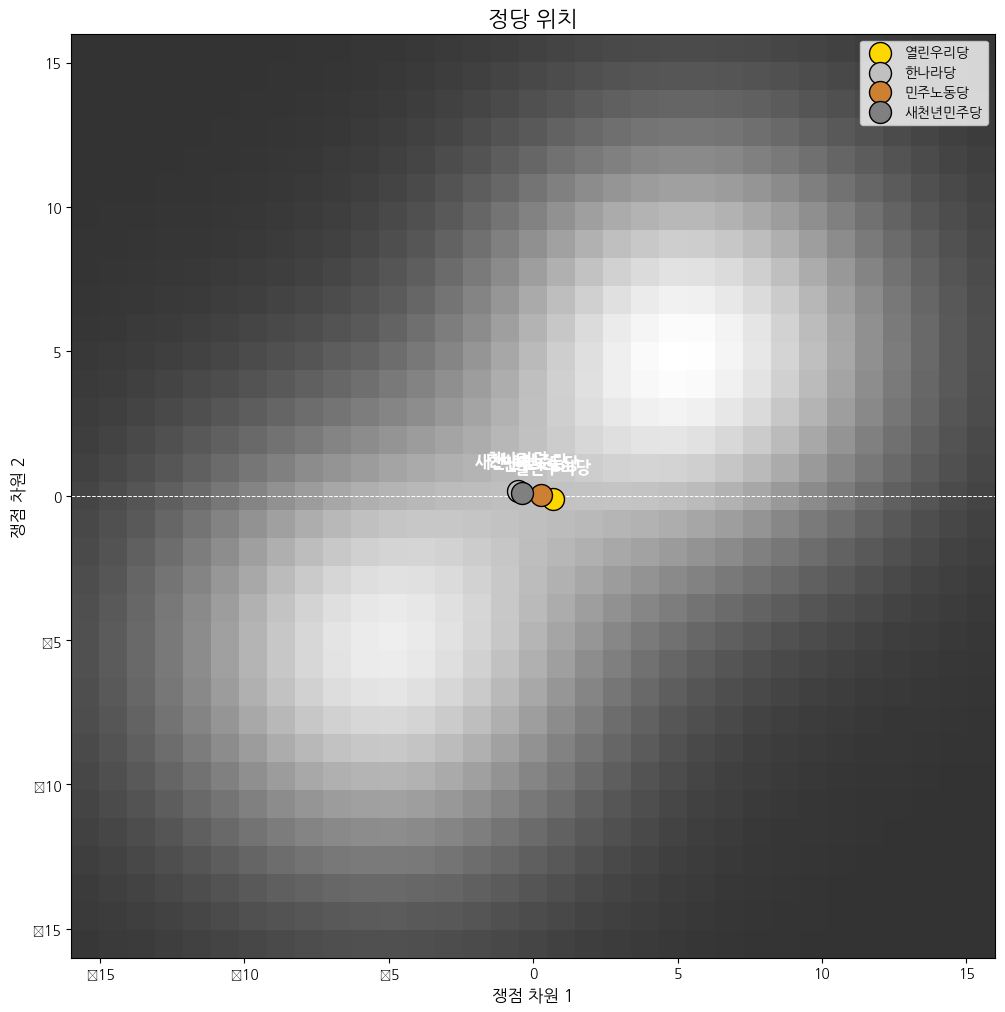

In [54]:
import os
import urllib.request
import matplotlib
from matplotlib import font_manager

font_url = "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf"
font_fname = "NanumGothic-Regular.ttf"
if not os.path.exists(font_fname):
    try:
        urllib.request.urlretrieve(font_url, font_fname)
    except Exception as e:
        print("폰트 다운로드 실패:", e)

# matplotlib에 폰트 추가 및 기본 폰트로 설정
try:
    font_manager.fontManager.addfont(font_fname)
    matplotlib.rcParams['font.family'] = 'NanumGothic'
except Exception as e:
    print("폰트 등록/설정 실패:", e)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NetLogo의 2변수 정규분포(공분산 0) PDF를 계산하는 함수
def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    # 0으로 나누기 방지
    if var == 0:
        var = 1e-6
        
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

# 1. 랭크 데이터 (이전 프롬프트에서 가져옴)
rank_data = {
    'rank': [1, 2, 3, 4],
    'mean_xcor': [0.6855, -0.5345, 0.2723, -0.3948],
    'mean_ycor': [-0.1159, 0.1567, 0.0178, 0.0948]
}
df_ranks = pd.DataFrame(rank_data)

# rank -> 한글 이름 매핑
rank_name_map = {
    1: '열린우리당',
    2: '한나라당',
    3: '민주노동당',
    4: '새천년민주당'
}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

# 2. 인구 분포 파라미터 (새 프롬프트에서 가져옴)
pop1_mean = (5.4966, 5.2082)
pop1_sd = 5.2829
pop2_mean = (-5.4046, -5.4368)
pop2_sd = 5.5137

# 3. NetLogo 월드 설정(-16~16, 33x33)에 맞는 그리드 생성
grid_size = 33 # 33x33 patches
x = np.linspace(-16, 16, grid_size)
y = np.linspace(-16, 16, grid_size)
X, Y = np.meshgrid(x, y)

# 4. 각 그리드 포인트에서 두 인구 집단의 밀도(Z) 계산
Z1 = bivariate_normal_pdf(X, Y, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2 = bivariate_normal_pdf(X, Y, pop2_mean[0], pop2_mean[1], pop2_sd)

# 두 인구의 밀도를 합산
Z = Z1 + Z2

# 5. 플롯 생성
fig, ax = plt.subplots(figsize=(12, 12))

# 6. 배경에 밀도(Z)를 픽셀화된 이미지(히트맵)로 그리기
ax.imshow(Z, 
          cmap='gray', 
          extent=[-16, 16, -16, 16],
          origin='lower', 
          interpolation='nearest',
          alpha=0.8)

# 7. 그 위에 랭크 위치 시각화 (각 포인트를 개별적으로 그리고 레이블에 한글 이름 사용)
colors = ['gold', 'silver', '#CD7F32', 'gray']
for i, row in df_ranks.iterrows():
    ax.scatter(row['mean_xcor'], row['mean_ycor'],
               s=250, c=colors[i % len(colors)], edgecolors='black',
               zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'], 
             row['mean_ycor'] + 0.8,
             row['party_name'],
             fontsize=12,
             ha='center', 
             va='bottom',
             color='white',
             fontweight='bold',
             zorder=6)

# 8. 플롯 설정 (NetLogo 월드 설정에 맞게 -16 ~ +16)
ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.set_xlim(-16, 16)
ax.set_ylim(-16, 16)
ax.set_title('정당 위치', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')
ax.legend()




C:\Users\jihun\AppData\Local\Temp\ipykernel_37548\1988381082.py:106: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.savefig('ranks_and_density_zoomed_in.png', dpi=150, bbox_inches='tight')


한글 폰트 설정 완료. Zoomed-in rank and density plot saved as ranks_and_density_zoomed_in.png


C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


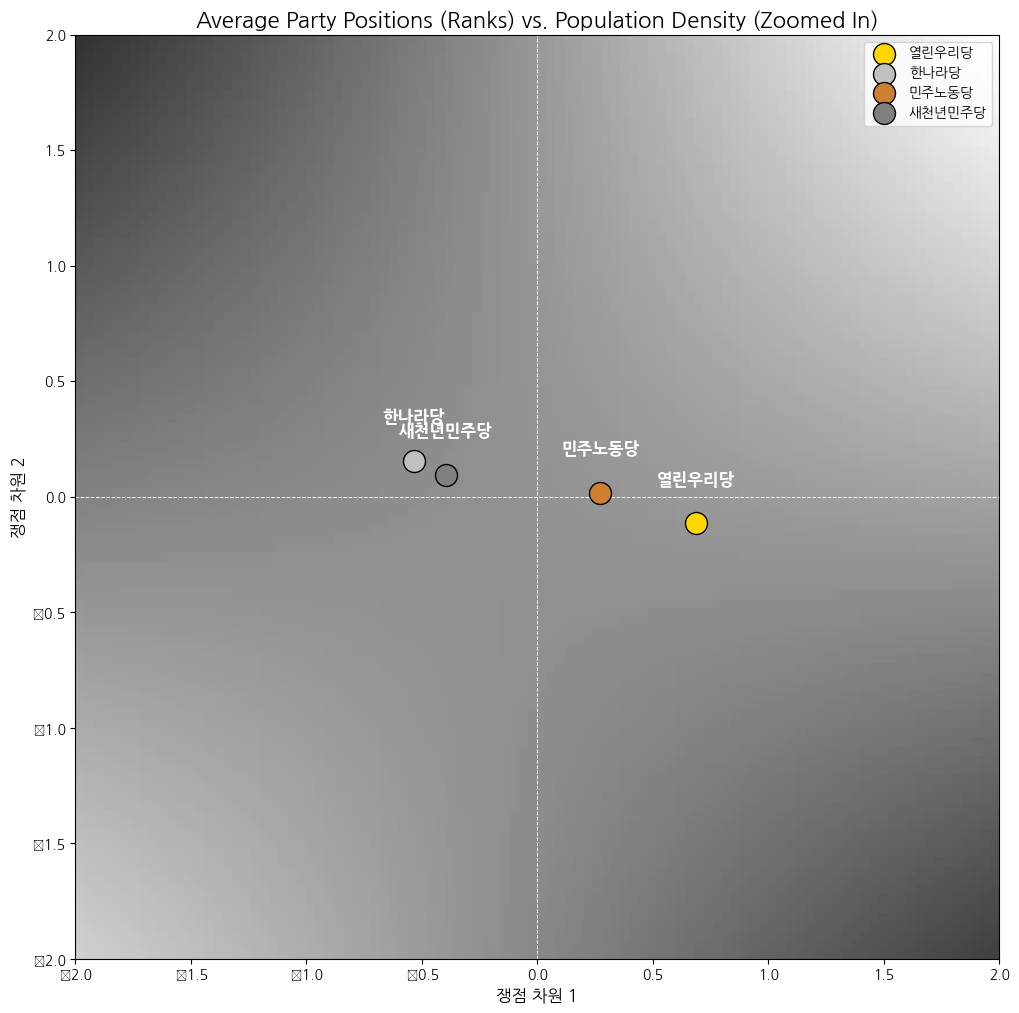

In [55]:
import os
import urllib.request
import matplotlib
from matplotlib import font_manager

font_url = "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf"
font_fname = "NanumGothic-Regular.ttf"
if not os.path.exists(font_fname):
    try:
        urllib.request.urlretrieve(font_url, font_fname)
    except Exception as e:
        print("폰트 다운로드 실패:", e)

# matplotlib에 폰트 추가 및 기본 폰트로 설정
try:
    font_manager.fontManager.addfont(font_fname)
    matplotlib.rcParams['font.family'] = 'NanumGothic'
except Exception as e:
    print("폰트 등록/설정 실패:", e)

# 기존 bivariate_normal_pdf, df_ranks, pop means/sds, zoom grid 코드 유지
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    if var == 0:
        var = 1e-6
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

rank_data = {
    'rank': [1, 2, 3, 4],
    'mean_xcor': [0.6855, -0.5345, 0.2723, -0.3948],
    'mean_ycor': [-0.1159, 0.1567, 0.0178, 0.0948]
}
df_ranks = pd.DataFrame(rank_data)

pop1_mean = (5.4966, 5.2082)
pop1_sd = 5.2829
pop2_mean = (-5.4046, -5.4368)
pop2_sd = 5.5137

fig, ax = plt.subplots(figsize=(12, 12))

# 확대 그리드
zoom_min, zoom_max = -2, 2
grid_res = 100
x_zoom = np.linspace(zoom_min, zoom_max, grid_res)
y_zoom = np.linspace(zoom_min, zoom_max, grid_res)
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)

Z1_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop2_mean[0], pop2_mean[1], pop2_sd)
Z_zoom = Z1_zoom + Z2_zoom

ax.imshow(Z_zoom,
          cmap='gray',
          extent=[zoom_min, zoom_max, zoom_min, zoom_max],
          origin='lower',
          interpolation='nearest',
          alpha=0.8)

# rank -> 한글 이름 매핑 및 시각화
rank_name_map = {
    1: '열린우리당',
    2: '한나라당',
    3: '민주노동당',
    4: '새천년민주당'
}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

colors = ['gold', 'silver', '#CD7F32', 'gray']
for i, row in df_ranks.iterrows():
    c = colors[i % len(colors)]
    ax.scatter(row['mean_xcor'], row['mean_ycor'], s=250, c=c, edgecolors='black', zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'],
            row['mean_ycor'] + 0.15,
            row['party_name'],
            fontsize=12,
            ha='center',
            va='bottom',
            color='white',
            fontweight='bold',
            zorder=6)

ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.axvline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)

ax.set_xlim(zoom_min, zoom_max)
ax.set_ylim(zoom_min, zoom_max)

ax.set_title('Average Party Positions (Ranks) vs. Population Density (Zoomed In)', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')

# 범례 중복 제거
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

fig.savefig('ranks_and_density_zoomed_in.png', dpi=150, bbox_inches='tight')
print("한글 폰트 설정 완료. Zoomed-in rank and density plot saved as ranks_and_density_zoomed_in.png")

In [34]:
for r in (1, 2, 3, 4,5,6):
    df_name = f"df_12_rank_{r}"
    df = globals().get(df_name)
    if df is None:
        print(f"{df_name}이(가) 없습니다. 건너뜁니다.")
        continue

    print(f"\n=== Summary for {df_name} (rank={r}) ===")
    # 가능한 vote percent 컬럼 결정 (원본 df를 건드리지 않도록 복사)
    d = df.copy()
    if 'vote_pct' in d.columns:
        vote_col = 'vote_pct'
    elif 'vote_share_pct' in d.columns:
        vote_col = 'vote_share_pct'
    elif 'vote_share' in d.columns:
        d['vote_share_pct'] = d['vote_share'] * 100
        vote_col = 'vote_share_pct'
    else:
        vote_col = None

    cols_to_check = [vote_col, 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']
    cols = [c for c in cols_to_check if c and c in d.columns]

    print("사용된 컬럼:", cols)
    if cols:
        stats = d[cols].agg(['mean', 'std']).T
        print("\n평균 및 표준편차:")
        print(stats.round(4))
    else:
        print("요청한 수치 컬럼이 없습니다.")

    # species 통계
    if 'species' in d.columns:
        sp_counts = d['species'].value_counts()
        sp_pct = d['species'].value_counts(normalize=True) * 100
        sp_summary = pd.concat([sp_counts, sp_pct.round(2)], axis=1)
        sp_summary.columns = ['count', 'percent']
        print("\nSpecies 분포:")
        print(sp_summary)
    else:
        print("\n'species' 컬럼이 없습니다.")


=== Summary for df_12_rank_1 (rank=1) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean      std
vote_pct          37.8411   3.2055
phi                0.5778   0.2906
xcor              -0.5971   3.7251
ycor               1.5554   6.7791
fitness            0.3850   0.0677
ideal_point_loss  -0.5897   0.6308
valence           69.4444  11.0240
age                7.3333   3.0822

Species 분포:
         count  percent
species                
H            3    33.33
E            2    22.22
A            2    22.22
P            1    11.11
S            1    11.11

=== Summary for df_12_rank_2 (rank=2) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean     std
vote_pct          26.9822  2.3231
phi                0.5778  0.2539
xcor               0.6809  5.1413
ycor               3.4279  8.3841
fitness            0.2561  0.0576
idea

In [35]:
# 통계(평균, 표준편차) 계산 (가능하면 기존 df_rank_1 사용, 없으면 df에서 rank==1으로 생성)
cols = [
    'voter-misery',
    'mean_eccentricity',
    'mean_party_policy_loss',
    'mean_party_policy_shift',
    'param_x_mean1', 'param_y_mean1', 'param_sd_1',
    'param_x_mean2', 'param_y_mean2', 'param_sd_2',
    'valence_lambda', 'campaign_ticks'
]

# source_df 결정
source_df = None
if 'df_12_rank_1' in globals():
    source_df = globals()['df_12_rank_1']
else:
    if 'df' in globals() and hasattr(globals()['df'], 'columns') and 'rank' in globals()['df'].columns:
        source_df = globals()['df'][globals()['df']['rank'] == 1].reset_index(drop=True).copy()
        globals()['df_rank_1'] = source_df
    else:
        for candidate in ('df_13', 'df_14', 'df_15', 'df_16'):
            if candidate in globals() and hasattr(globals()[candidate], 'columns') and 'rank' in globals()[candidate].columns:
                source_df = globals()[candidate][globals()[candidate]['rank'] == 1].reset_index(drop=True).copy()
                globals()['df_rank_1'] = source_df
                break

if source_df is None:
    print("df_rank_1을 찾을 수 없고, 적절한 데이터프레임에서 생성할 수 없습니다. 먼저 df_rank_1 또는 rank 컬럼을 포함한 df를 만드세요.")
else:
    available = [c for c in cols if c in source_df.columns]
    if not available:
        print("요청한 컬럼이 분석 대상 데이터프레임에 없습니다. 가능한 컬럼:", list(source_df.columns))
    else:
        means = source_df[available].mean()
        stds = source_df[available].std()
        stats = pd.DataFrame({'mean': means, 'std': stds}).round(4)
        print("평균 및 표준편차:")
        print(stats)

평균 및 표준편차:
                             mean      std
voter-misery               0.3355   0.0439
mean_eccentricity          0.8849   0.1781
mean_party_policy_loss    -0.7644   0.2552
mean_party_policy_shift    1.8976   2.8426
param_x_mean1              4.6189   2.8006
param_y_mean1              5.4500   3.0799
param_sd_1                 5.2667   1.2334
param_x_mean2             -4.1856   3.4229
param_y_mean2             -4.8011   3.3040
param_sd_2                 6.0544   1.0687
valence_lambda             0.5000   0.1414
campaign_ticks           200.0000  70.7107


C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


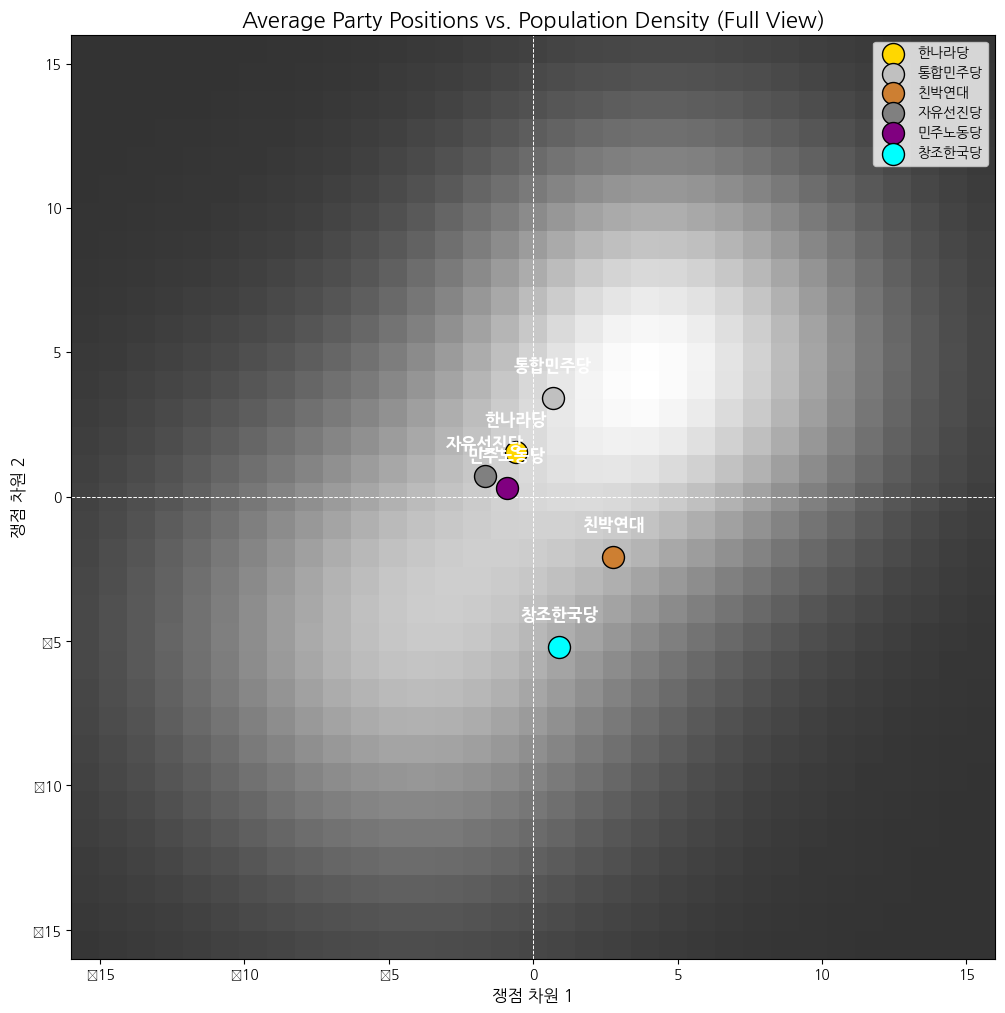

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    if var == 0:
        var = 1e-6
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

rank_data = {
    'rank': [1, 2, 3, 4, 5, 6],
    'mean_xcor': [-0.5971, 0.6809, 2.7734, -1.6698, -0.9229, 0.9009],
    'mean_ycor': [1.5554, 3.4279, -2.0965, 0.7336,  0.3013, -5.1880]
}
df_ranks = pd.DataFrame(rank_data)

# 요청하신 순서대로 한글 당명 매핑
rank_name_map = {
    1: '한나라당',
    2: '통합민주당',
    3: '친박연대',
    4: '자유선진당',
    5: '민주노동당',
    6: '창조한국당'
}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

pop1_mean = (4.6189, 5.0214)
pop1_sd = 5.2667
pop2_mean = (-4.1856, -4.8011)
pop2_sd = 6.0544

grid_size = 33 
x = np.linspace(-16, 16, grid_size)
y = np.linspace(-16, 16, grid_size)
X, Y = np.meshgrid(x, y)

Z1 = bivariate_normal_pdf(X, Y, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2 = bivariate_normal_pdf(X, Y, pop2_mean[0], pop2_mean[1], pop2_sd)
Z = Z1 + Z2

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(Z, 
          cmap='gray', 
          extent=[-16, 16, -16, 16], 
          origin='lower', 
          interpolation='nearest',
          alpha=0.8) 

colors = ['gold', 'silver', '#CD7F32', 'gray', 'purple', 'cyan']
# 각 랭크별로 점과 레이블을 그려 범례에 당명 표시
for i, row in df_ranks.iterrows():
    c = colors[i % len(colors)]
    ax.scatter(row['mean_xcor'], row['mean_ycor'], s=250, c=c, edgecolors='black', zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'], 
             row['mean_ycor'] + 0.8, 
             row['party_name'], 
             fontsize=12,
             ha='center', 
             va='bottom',
             color='white', 
             fontweight='bold',
             zorder=6)

ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.axvline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.set_xlim(-16, 16)
ax.set_ylim(-16, 16)
ax.set_title('Average Party Positions vs. Population Density (Full View)', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')

# 범례 중복 제거
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
plt.show()

C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


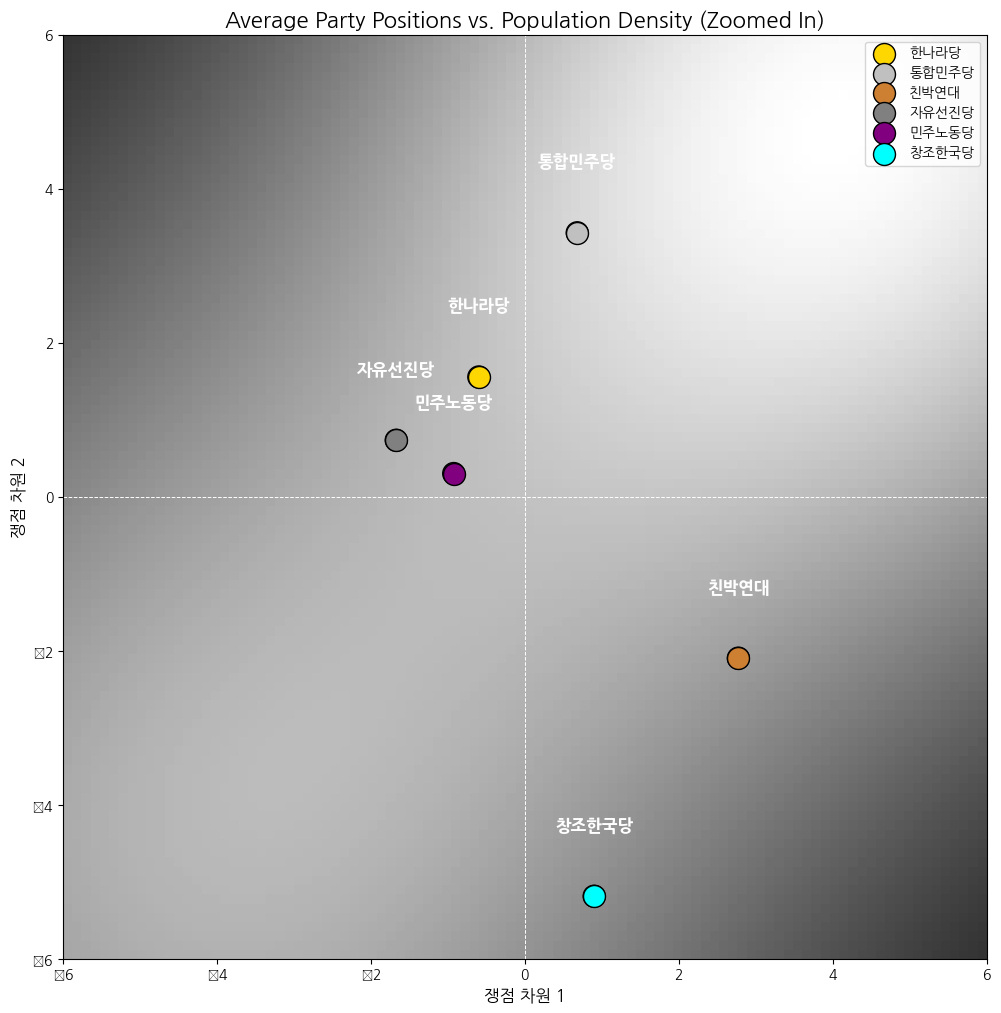

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NetLogo의 2변수 정규분포(공분산 0) PDF를 계산하는 함수
def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    if var == 0:
        var = 1e-6
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

# 1. 랭크 데이터 (새로 제공된 데이터)
rank_data = {
    'rank': [1, 2, 3, 4, 5, 6],
    'mean_xcor': [-0.5971, 0.6809, 2.7734, -1.6698, -0.9229, 0.9009],
    'mean_ycor': [1.5554, 3.4279, -2.0965, 0.7336,  0.3013, -5.1880]
}
df_ranks = pd.DataFrame(rank_data)

rank_name_map = {
    1: '한나라당',
    2: '통합민주당',
    3: '친박연대',
    4: '자유선진당',
    5: '민주노동당',
    6: '창조한국당'
}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

# 2. 인구 분포 파라미터 (새로 제공된 데이터)
pop1_mean = (4.6189, 5.4500)
pop1_sd = 5.2667
pop2_mean = (-4.1856, -4.8011)
pop2_sd = 6.0544

# 3. 플롯 생성 (Zoomed-In)
fig, ax = plt.subplots(figsize=(12, 12))

# 4. --- (수정) ---
# 확대된 범위(-4 ~ 4)에 맞는 그리드 생성
# (이전 데이터는 (-2, 2)였지만, 새 데이터는 더 넓게 퍼져있어 (-4, 4)로 변경)
zoom_min = -6
zoom_max = 6
grid_res = 100 
x_zoom = np.linspace(zoom_min, zoom_max, grid_res)
y_zoom = np.linspace(zoom_min, zoom_max, grid_res)
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)

# 확대된 그리드 포인트에서 밀도 계산
Z1_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop2_mean[0], pop2_mean[1], pop2_sd)
Z_zoom = Z1_zoom + Z2_zoom

# 확대된 배경에 밀도 히트맵 그리기
ax.imshow(Z_zoom, 
          cmap='gray', 
          extent=[zoom_min, zoom_max, zoom_min, zoom_max], 
          origin='lower', 
          interpolation='nearest',
          alpha=0.8) 

# 5. 랭크 위치 시각화
colors = ['gold', 'silver', '#CD7F32', 'gray', 'purple', 'cyan']
ax.scatter(df_ranks['mean_xcor'], df_ranks['mean_ycor'], s=250, c=colors, edgecolors='black', zorder=5)

# 6. 랭크 라벨 추가
for i, row in df_ranks.iterrows():
    c = colors[i % len(colors)]
    ax.scatter(row['mean_xcor'], row['mean_ycor'], s=250, c=c, edgecolors='black', zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'], 
             row['mean_ycor'] + 0.8, 
             row['party_name'], 
             fontsize=12,
             ha='center', 
             va='bottom',
             color='white', 
             fontweight='bold',
             zorder=6)

# 7. 플롯 설정 (확대된 범위 -4 ~ +4)
ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.axvline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.set_xlim(zoom_min, zoom_max)
ax.set_ylim(zoom_min, zoom_max)
ax.set_title('Average Party Positions vs. Population Density (Zoomed In)', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')
ax.legend()

# 범례 중복 제거
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
plt.show()

In [38]:
for r in (1, 2, 3, 4):
    df_name = f"df_13_rank_{r}"
    df = globals().get(df_name)
    if df is None:
        print(f"{df_name}이(가) 없습니다. 건너뜁니다.")
        continue

    print(f"\n=== Summary for {df_name} (rank={r}) ===")
    # 가능한 vote percent 컬럼 결정 (원본 df를 건드리지 않도록 복사)
    d = df.copy()
    if 'vote_pct' in d.columns:
        vote_col = 'vote_pct'
    elif 'vote_share_pct' in d.columns:
        vote_col = 'vote_share_pct'
    elif 'vote_share' in d.columns:
        d['vote_share_pct'] = d['vote_share'] * 100
        vote_col = 'vote_share_pct'
    else:
        vote_col = None

    cols_to_check = [vote_col, 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']
    cols = [c for c in cols_to_check if c and c in d.columns]

    print("사용된 컬럼:", cols)
    if cols:
        stats = d[cols].agg(['mean', 'std']).T
        print("\n평균 및 표준편차:")
        print(stats.round(4))
    else:
        print("요청한 수치 컬럼이 없습니다.")

    # species 통계
    if 'species' in d.columns:
        sp_counts = d['species'].value_counts()
        sp_pct = d['species'].value_counts(normalize=True) * 100
        sp_summary = pd.concat([sp_counts, sp_pct.round(2)], axis=1)
        sp_summary.columns = ['count', 'percent']
        print("\nSpecies 분포:")
        print(sp_summary)
    else:
        print("\n'species' 컬럼이 없습니다.")


=== Summary for df_13_rank_1 (rank=1) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean      std
vote_pct          44.2538   2.1256
phi                0.5798   0.3749
xcor              -0.3132   5.8173
ycor              -0.4123   5.7627
fitness            0.4423   0.0629
ideal_point_loss  -0.5850   0.5935
valence           65.3101  15.4079
age                8.1938   3.7792

Species 분포:
         count  percent
species                
H           33    25.58
E           30    23.26
A           26    20.16
P           21    16.28
S           19    14.73

=== Summary for df_13_rank_2 (rank=2) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean      std
vote_pct          37.7265   2.3735
phi                0.5256   0.3759
xcor               0.5556   5.8996
ycor               0.3733   6.1014
fitness            0.3899   0.058

In [39]:
# 통계(평균, 표준편차) 계산 (가능하면 기존 df_rank_1 사용, 없으면 df에서 rank==1으로 생성)
cols = [
    'voter-misery',
    'mean_eccentricity',
    'mean_party_policy_loss',
    'mean_party_policy_shift',
    'param_x_mean1', 'param_y_mean1', 'param_sd_1',
    'param_x_mean2', 'param_y_mean2', 'param_sd_2',
    'valence_lambda', 'campaign_ticks'
]

# source_df 결정
source_df = None
if 'df_13_rank_1' in globals():
    source_df = globals()['df_13_rank_1']
else:
    if 'df' in globals() and hasattr(globals()['df'], 'columns') and 'rank' in globals()['df'].columns:
        source_df = globals()['df'][globals()['df']['rank'] == 1].reset_index(drop=True).copy()
        globals()['df_rank_1'] = source_df
    else:
        for candidate in ('df_13', 'df_14', 'df_15', 'df_16'):
            if candidate in globals() and hasattr(globals()[candidate], 'columns') and 'rank' in globals()[candidate].columns:
                source_df = globals()[candidate][globals()[candidate]['rank'] == 1].reset_index(drop=True).copy()
                globals()['df_rank_1'] = source_df
                break

if source_df is None:
    print("df_rank_1을 찾을 수 없고, 적절한 데이터프레임에서 생성할 수 없습니다. 먼저 df_rank_1 또는 rank 컬럼을 포함한 df를 만드세요.")
else:
    available = [c for c in cols if c in source_df.columns]
    if not available:
        print("요청한 컬럼이 분석 대상 데이터프레임에 없습니다. 가능한 컬럼:", list(source_df.columns))
    else:
        means = source_df[available].mean()
        stds = source_df[available].std()
        stats = pd.DataFrame({'mean': means, 'std': stds}).round(4)
        print("평균 및 표준편차:")
        print(stats)

평균 및 표준편차:
                             mean      std
voter-misery               0.4265   0.1045
mean_eccentricity          0.8631   0.2048
mean_party_policy_loss    -0.6692   0.3646
mean_party_policy_shift    0.7376   1.4155
param_x_mean1              5.0342   2.7425
param_y_mean1              5.1888   2.9776
param_sd_1                 5.2019   1.2632
param_x_mean2             -5.1023   2.7948
param_y_mean2             -5.3495   2.9329
param_sd_2                 5.1530   1.2547
valence_lambda             0.5295   0.1583
campaign_ticks           200.0000  82.9156


C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


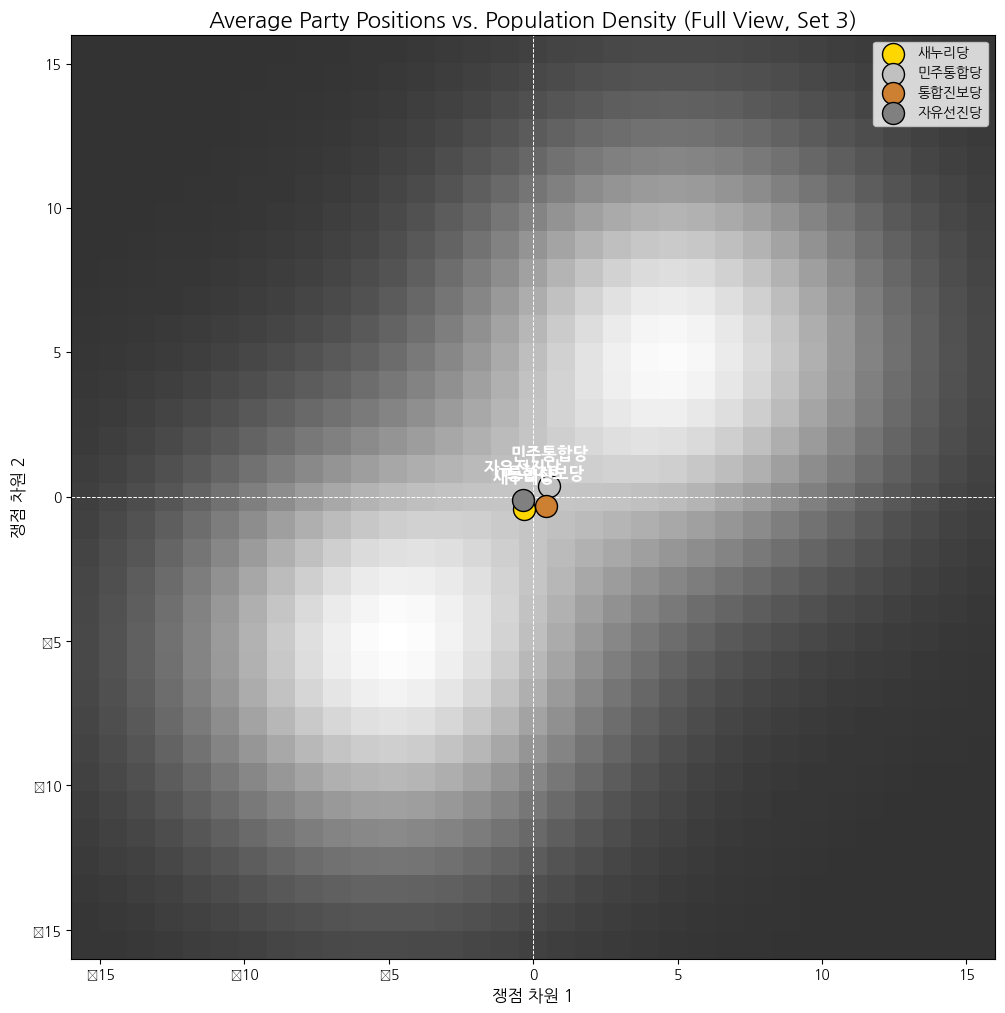

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NetLogo의 2변수 정규분포(공분산 0) PDF를 계산하는 함수
def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    if var == 0:
        var = 1e-6
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

# 1. 랭크 데이터 (df_13_... 데이터)
rank_data = {
    'rank': [1, 2, 3, 4],
    'mean_xcor': [-0.3132, 0.5556, 0.4283, -0.3539],
    'mean_ycor': [-0.4123, 0.3733, -0.3201, -0.1241]
}
df_ranks = pd.DataFrame(rank_data)

# 2. 인구 분포 파라미터 (param_... 데이터)
pop1_mean = (5.0342, 5.1888)
pop1_sd = 5.2019
pop2_mean = (-5.1023, -5.3495)
pop2_sd = 5.1530

# 3. NetLogo 월드 설정(-16~16, 33x33)에 맞는 그리드 생성
grid_size = 33 
x = np.linspace(-16, 16, grid_size)
y = np.linspace(-16, 16, grid_size)
X, Y = np.meshgrid(x, y)

# 4. 각 그리드 포인트에서 두 인구 집단의 밀도(Z) 계산
Z1 = bivariate_normal_pdf(X, Y, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2 = bivariate_normal_pdf(X, Y, pop2_mean[0], pop2_mean[1], pop2_sd)
Z = Z1 + Z2

# 5. 플롯 생성 (Zoomed-Out)
fig, ax = plt.subplots(figsize=(12, 12))

# 6. 배경에 밀도(Z)를 픽셀화된 이미지(히트맵)로 그리기
ax.imshow(Z, 
          cmap='gray', 
          extent=[-16, 16, -16, 16], 
          origin='lower', 
          interpolation='nearest',
          alpha=0.8) 

# 7. 그 위에 랭크 위치 시각화
# 랭크 순서대로 이름 지정: 1->새누리당, 2->민주통합당, 3->통합진보당, 4->자유선진당
rank_name_map = {1: '새누리당', 2: '민주통합당', 3: '통합진보당', 4: '자유선진당'}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

colors = ['gold', 'silver', '#CD7F32', 'gray']
for i, row in df_ranks.iterrows():
    ax.scatter(row['mean_xcor'], row['mean_ycor'],
               s=250, c=colors[i % len(colors)], edgecolors='black',
               zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'], 
             row['mean_ycor'] + 0.8, 
             row['party_name'], 
             fontsize=12,
             ha='center', 
             va='bottom',
             color='white', 
             fontweight='bold',
             zorder=6)

# 8. 플롯 설정 (NetLogo 월드 설정에 맞게 -16 ~ +16)
ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.axvline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.set_xlim(-16, 16)
ax.set_ylim(-16, 16)
ax.set_title('Average Party Positions vs. Population Density (Full View, Set 3)', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')

# 범례 중복 제거
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
plt.show()


C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


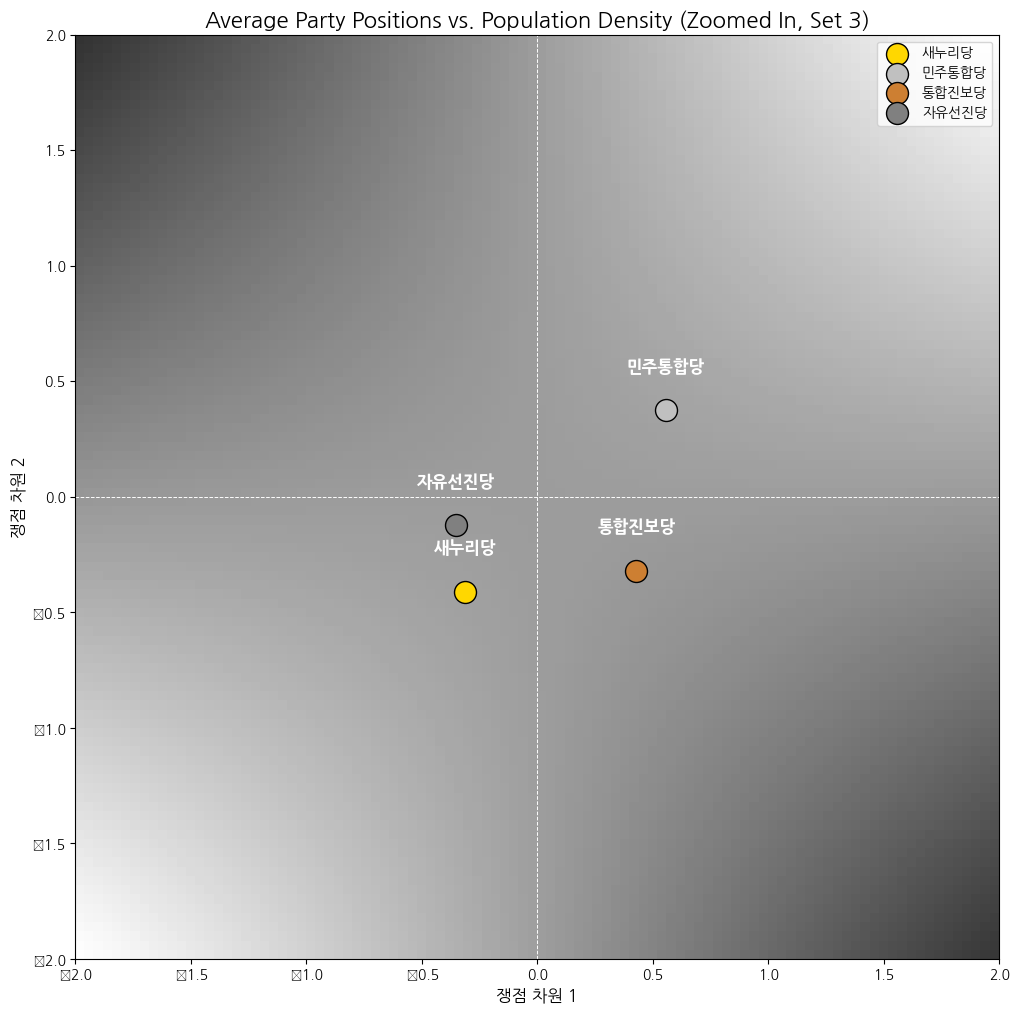

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NetLogo의 2변수 정규분포(공분산 0) PDF를 계산하는 함수
def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    if var == 0:
        var = 1e-6
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

# 1. 랭크 데이터 (df_13_... 데이터)
rank_data = {
    'rank': [1, 2, 3, 4],
    'mean_xcor': [-0.3132, 0.5556, 0.4283, -0.3539],
    'mean_ycor': [-0.4123, 0.3733, -0.3201, -0.1241]
}
df_ranks = pd.DataFrame(rank_data)

# 랭크 이름 순서대로: 새누리당, 민주통합당, 통합진보당, 자유선진당
rank_name_map = {1: '새누리당', 2: '민주통합당', 3: '통합진보당', 4: '자유선진당'}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

# 2. 인구 분포 파라미터 (param_... 데이터)
pop1_mean = (5.0342, 5.1888)
pop1_sd = 5.2019
pop2_mean = (-5.1023, -5.3495)
pop2_sd = 5.1530

# 3. 플롯 생성 (Zoomed-In)
fig, ax = plt.subplots(figsize=(12, 12))

# 4. 확대된 범위(-2 ~ 2)에 맞는 그리드 생성
zoom_min = -2
zoom_max = 2
grid_res = 100 
x_zoom = np.linspace(zoom_min, zoom_max, grid_res)
y_zoom = np.linspace(zoom_min, zoom_max, grid_res)
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)

# 확대된 그리드 포인트에서 밀도 계산
Z1_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop2_mean[0], pop2_mean[1], pop2_sd)
Z_zoom = Z1_zoom + Z2_zoom

# 확대된 배경에 밀도 히트맵 그리기
ax.imshow(Z_zoom, 
          cmap='gray', 
          extent=[zoom_min, zoom_max, zoom_min, zoom_max], 
          origin='lower', 
          interpolation='nearest',
          alpha=0.8) 

# 5. 랭크 위치 시각화 (각 포인트에 당명 레이블)
colors = ['gold', 'silver', '#CD7F32', 'gray']
for i, row in df_ranks.iterrows():
    c = colors[i % len(colors)]
    ax.scatter(row['mean_xcor'], row['mean_ycor'], s=250, c=c, edgecolors='black', zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'], 
             row['mean_ycor'] + 0.15, # offset
             row['party_name'],
             fontsize=12,
             ha='center', 
             va='bottom',
             color='white', 
             fontweight='bold',
             zorder=6)

# 7. 플롯 설정 (확대된 범위 -2 ~ +2)
ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.axvline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.set_xlim(zoom_min, zoom_max)
ax.set_ylim(zoom_min, zoom_max)
ax.set_title('Average Party Positions vs. Population Density (Zoomed In, Set 3)', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')

# 범례 중복 제거
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

In [42]:
for r in (1, 2, 3, 4):
    df_name = f"df_14_rank_{r}"
    df = globals().get(df_name)
    if df is None:
        print(f"{df_name}이(가) 없습니다. 건너뜁니다.")
        continue

    print(f"\n=== Summary for {df_name} (rank={r}) ===")
    # 가능한 vote percent 컬럼 결정 (원본 df를 건드리지 않도록 복사)
    d = df.copy()
    if 'vote_pct' in d.columns:
        vote_col = 'vote_pct'
    elif 'vote_share_pct' in d.columns:
        vote_col = 'vote_share_pct'
    elif 'vote_share' in d.columns:
        d['vote_share_pct'] = d['vote_share'] * 100
        vote_col = 'vote_share_pct'
    else:
        vote_col = None

    cols_to_check = [vote_col, 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']
    cols = [c for c in cols_to_check if c and c in d.columns]

    print("사용된 컬럼:", cols)
    if cols:
        stats = d[cols].agg(['mean', 'std']).T
        print("\n평균 및 표준편차:")
        print(stats.round(4))
    else:
        print("요청한 수치 컬럼이 없습니다.")

    # species 통계
    if 'species' in d.columns:
        sp_counts = d['species'].value_counts()
        sp_pct = d['species'].value_counts(normalize=True) * 100
        sp_summary = pd.concat([sp_counts, sp_pct.round(2)], axis=1)
        sp_summary.columns = ['count', 'percent']
        print("\nSpecies 분포:")
        print(sp_summary)
    else:
        print("\n'species' 컬럼이 없습니다.")


=== Summary for df_14_rank_1 (rank=1) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean      std
vote_pct          33.8885   2.7189
phi                0.5423   0.3632
xcor               0.0888   5.9101
ycor               0.2381   6.1662
fitness            0.3499   0.0536
ideal_point_loss  -0.6878   0.8328
valence           59.9760  18.0478
age                8.3077   4.0542

Species 분포:
         count  percent
species                
E           52    25.00
A           47    22.60
H           43    20.67
P           36    17.31
S           30    14.42

=== Summary for df_14_rank_2 (rank=2) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean      std
vote_pct          28.7431   2.3051
phi                0.5625   0.3613
xcor              -0.3338   6.2619
ycor               0.2860   6.1078
fitness            0.3091   0.053

In [43]:
# 통계(평균, 표준편차) 계산 (가능하면 기존 df_rank_1 사용, 없으면 df에서 rank==1으로 생성)
cols = [
    'voter-misery',
    'mean_eccentricity',
    'mean_party_policy_loss',
    'mean_party_policy_shift',
    'param_x_mean1', 'param_y_mean1', 'param_sd_1',
    'param_x_mean2', 'param_y_mean2', 'param_sd_2',
    'valence_lambda', 'campaign_ticks'
]

# source_df 결정
source_df = None
if 'df_14_rank_1' in globals():
    source_df = globals()['df_14_rank_1']
else:
    if 'df' in globals() and hasattr(globals()['df'], 'columns') and 'rank' in globals()['df'].columns:
        source_df = globals()['df'][globals()['df']['rank'] == 1].reset_index(drop=True).copy()
        globals()['df_rank_1'] = source_df
    else:
        for candidate in ('df_13', 'df_14', 'df_15', 'df_16'):
            if candidate in globals() and hasattr(globals()[candidate], 'columns') and 'rank' in globals()[candidate].columns:
                source_df = globals()[candidate][globals()[candidate]['rank'] == 1].reset_index(drop=True).copy()
                globals()['df_rank_1'] = source_df
                break

if source_df is None:
    print("df_rank_1을 찾을 수 없고, 적절한 데이터프레임에서 생성할 수 없습니다. 먼저 df_rank_1 또는 rank 컬럼을 포함한 df를 만드세요.")
else:
    available = [c for c in cols if c in source_df.columns]
    if not available:
        print("요청한 컬럼이 분석 대상 데이터프레임에 없습니다. 가능한 컬럼:", list(source_df.columns))
    else:
        means = source_df[available].mean()
        stds = source_df[available].std()
        stats = pd.DataFrame({'mean': means, 'std': stds}).round(4)
        print("평균 및 표준편차:")
        print(stats)

평균 및 표준편차:
                             mean      std
voter-misery               0.4302   0.0975
mean_eccentricity          0.8577   0.1916
mean_party_policy_loss    -0.7080   0.3562
mean_party_policy_shift    1.0545   1.9728
param_x_mean1              4.7727   2.9465
param_y_mean1              5.4915   2.8340
param_sd_1                 5.7539   1.3641
param_x_mean2             -5.0786   2.6509
param_y_mean2             -5.2561   2.8721
param_sd_2                 5.8010   1.3673
valence_lambda             0.4510   0.1526
campaign_ticks           207.6923  80.0873


C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


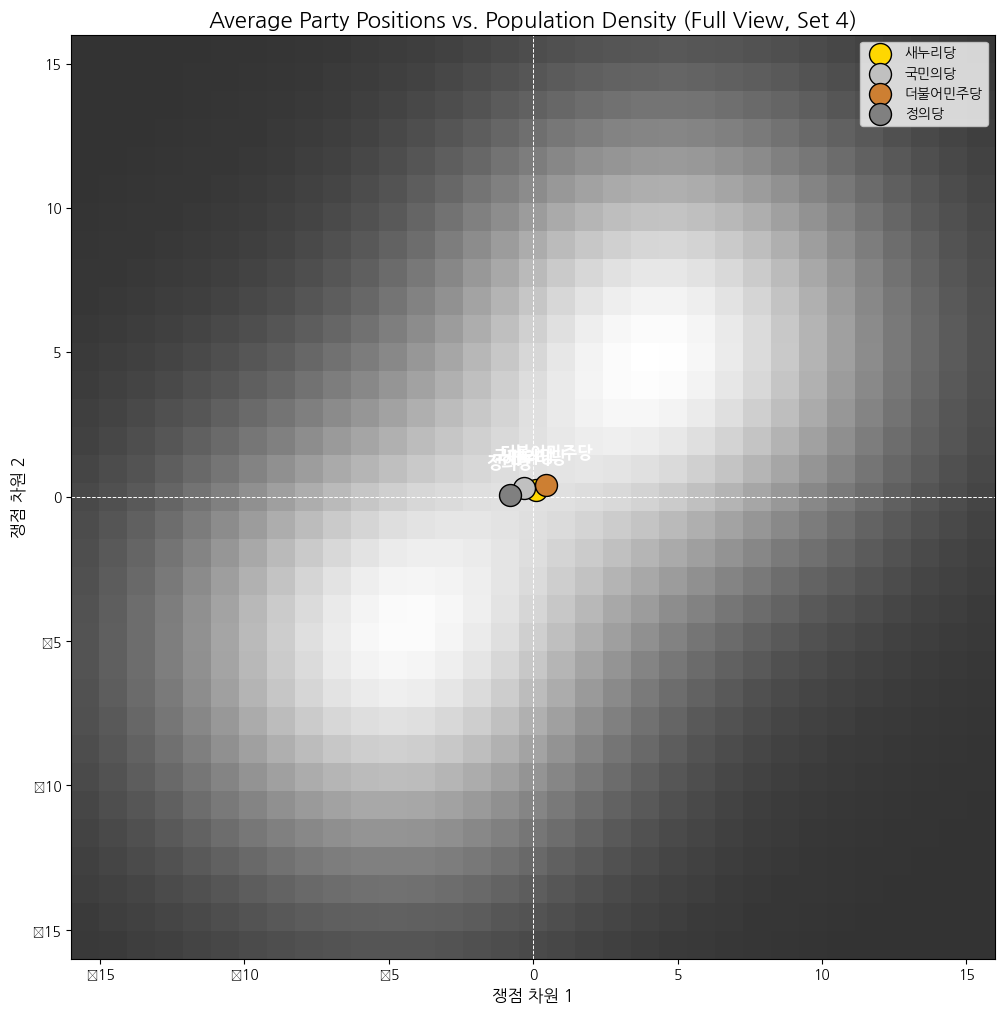

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NetLogo의 2변수 정규분포(공분산 0) PDF를 계산하는 함수
def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    if var == 0:
        var = 1e-6
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

# 1. 랭크 데이터 (df_14_... 데이터)
rank_data = {
    'rank': [1, 2, 3, 4],
    'mean_xcor': [0.0888, -0.3338, 0.4622, -0.7928],
    'mean_ycor': [0.2381, 0.2860, 0.4185, 0.0736]
}
df_ranks = pd.DataFrame(rank_data)

# 랭크 이름 순서 변경: 1->새누리당, 2->국민의당, 3->더불어민주당, 4->정의당
rank_name_map = {1: '새누리당', 2: '국민의당', 3: '더불어민주당', 4: '정의당'}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

# 2. 인구 분포 파라미터 (param_... 데이터)
pop1_mean = (4.7727, 5.4915)
pop1_sd = 5.7539
pop2_mean = (-5.0786, -5.2561)
pop2_sd = 5.8010

# 3. NetLogo 월드 설정(-16~16, 33x33)에 맞는 그리드 생성
grid_size = 33 
x = np.linspace(-16, 16, grid_size)
y = np.linspace(-16, 16, grid_size)
X, Y = np.meshgrid(x, y)

# 4. 각 그리드 포인트에서 두 인구 집단의 밀도(Z) 계산
Z1 = bivariate_normal_pdf(X, Y, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2 = bivariate_normal_pdf(X, Y, pop2_mean[0], pop2_mean[1], pop2_sd)
Z = Z1 + Z2

# 5. 플롯 생성 (Zoomed-Out)
fig, ax = plt.subplots(figsize=(12, 12))

# 6. 배경에 밀도(Z)를 픽셀화된 이미지(히트맵)로 그리기
ax.imshow(Z, 
          cmap='gray', 
          extent=[-16, 16, -16, 16], 
          origin='lower', 
          interpolation='nearest',
          alpha=0.8) 

# 7. 그 위에 랭크 위치 시각화 (각 포인트에 당명 레이블)
colors = ['gold', 'silver', '#CD7F32', 'gray']
for i, row in df_ranks.iterrows():
    c = colors[i % len(colors)]
    ax.scatter(row['mean_xcor'], row['mean_ycor'], s=250, c=c, edgecolors='black', zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'], 
             row['mean_ycor'] + 0.8, 
             row['party_name'], 
             fontsize=12,
             ha='center', 
             va='bottom',
             color='white', 
             fontweight='bold',
             zorder=6)

# 8. 플롯 설정 (NetLogo 월드 설정에 맞게 -16 ~ +16)
ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.axvline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.set_xlim(-16, 16)
ax.set_ylim(-16, 16)
ax.set_title('Average Party Positions vs. Population Density (Full View, Set 4)', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')

# 범례 중복 제거
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())


랭크 이름을 새누리당, 국민의당, 더불어민주당, 정의당 순서로 변경했습니다. Zoomed-in plot (Set 4) 표시 완료.


C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


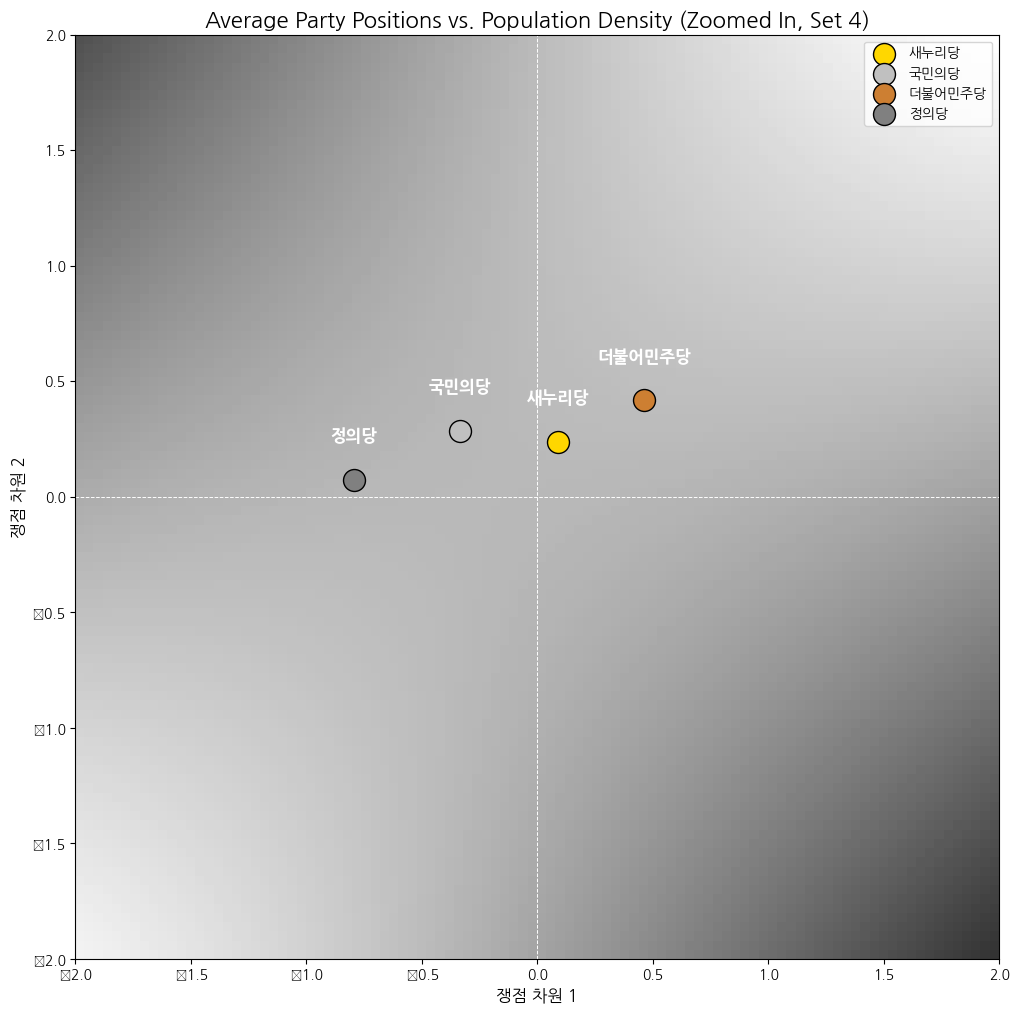

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NetLogo의 2변수 정규분포(공분산 0) PDF를 계산하는 함수
def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    if var == 0:
        var = 1e-6
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

# 1. 랭크 데이터 (df_14_... 데이터)
rank_data = {
    'rank': [1, 2, 3, 4],
    'mean_xcor': [0.0888, -0.3338, 0.4622, -0.7928],
    'mean_ycor': [0.2381, 0.2860, 0.4185, 0.0736]
}
df_ranks = pd.DataFrame(rank_data)

# 랭크 이름 순서대로: 새누리당, 국민의당, 더불어민주당, 정의당
rank_name_map = {1: '새누리당', 2: '국민의당', 3: '더불어민주당', 4: '정의당'}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

# 2. 인구 분포 파라미터 (param_... 데이터)
pop1_mean = (4.7727, 5.4915)
pop1_sd = 5.7539
pop2_mean = (-5.0786, -5.2561)
pop2_sd = 5.8010

# 3. 플롯 생성 (Zoomed-In)
fig, ax = plt.subplots(figsize=(12, 12))

# 4. 확대된 범위(-2 ~ 2)에 맞는 그리드 생성
zoom_min = -2
zoom_max = 2
grid_res = 100 
x_zoom = np.linspace(zoom_min, zoom_max, grid_res)
y_zoom = np.linspace(zoom_min, zoom_max, grid_res)
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)

# 확대된 그리드 포인트에서 밀도 계산
Z1_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop2_mean[0], pop2_mean[1], pop2_sd)
Z_zoom = Z1_zoom + Z2_zoom

# 확대된 배경에 밀도 히트맵 그리기
ax.imshow(Z_zoom, 
          cmap='gray', 
          extent=[zoom_min, zoom_max, zoom_min, zoom_max], 
          origin='lower', 
          interpolation='nearest',
          alpha=0.8) 

# 5. 랭크 위치 시각화 (각 당을 개별적으로 그리고 범례에 당명 사용)
colors = ['gold', 'silver', '#CD7F32', 'gray']
for i, row in df_ranks.iterrows():
    c = colors[i % len(colors)]
    ax.scatter(row['mean_xcor'], row['mean_ycor'], s=250, c=c, edgecolors='black', zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'], 
             row['mean_ycor'] + 0.15, # offset 조정
             row['party_name'], 
             fontsize=12,
             ha='center', 
             va='bottom',
             color='white', 
             fontweight='bold',
             zorder=6)

# 7. 플롯 설정 (확대된 범위 -2 ~ +2)
ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.axvline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.set_xlim(zoom_min, zoom_max)
ax.set_ylim(zoom_min, zoom_max)
ax.set_title('Average Party Positions vs. Population Density (Zoomed In, Set 4)', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')

# 범례 중복 제거
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# 8. 플롯 저장 안내
print("랭크 이름을 새누리당, 국민의당, 더불어민주당, 정의당 순서로 변경했습니다. Zoomed-in plot (Set 4) 표시 완료.")

In [46]:
for r in (1, 2, 3, 4, 5):
    df_name = f"df_15_rank_{r}"
    df = globals().get(df_name)
    if df is None:
        print(f"{df_name}이(가) 없습니다. 건너뜁니다.")
        continue

    print(f"\n=== Summary for {df_name} (rank={r}) ===")
    # 가능한 vote percent 컬럼 결정 (원본 df를 건드리지 않도록 복사)
    d = df.copy()
    if 'vote_pct' in d.columns:
        vote_col = 'vote_pct'
    elif 'vote_share_pct' in d.columns:
        vote_col = 'vote_share_pct'
    elif 'vote_share' in d.columns:
        d['vote_share_pct'] = d['vote_share'] * 100
        vote_col = 'vote_share_pct'
    else:
        vote_col = None

    cols_to_check = [vote_col, 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']
    cols = [c for c in cols_to_check if c and c in d.columns]

    print("사용된 컬럼:", cols)
    if cols:
        stats = d[cols].agg(['mean', 'std']).T
        print("\n평균 및 표준편차:")
        print(stats.round(4))
    else:
        print("요청한 수치 컬럼이 없습니다.")

    # species 통계
    if 'species' in d.columns:
        sp_counts = d['species'].value_counts()
        sp_pct = d['species'].value_counts(normalize=True) * 100
        sp_summary = pd.concat([sp_counts, sp_pct.round(2)], axis=1)
        sp_summary.columns = ['count', 'percent']
        print("\nSpecies 분포:")
        print(sp_summary)
    else:
        print("\n'species' 컬럼이 없습니다.")


=== Summary for df_15_rank_1 (rank=1) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean      std
vote_pct          37.0256   0.9994
phi                0.5111   0.4256
xcor               0.5623   4.4724
ycor              -2.2024   6.6754
fitness            0.3752   0.0236
ideal_point_loss  -0.5285   0.6198
valence           63.8889  18.1621
age                9.6667   3.5707

Species 분포:
         count  percent
species                
H            4    44.44
P            3    33.33
A            2    22.22

=== Summary for df_15_rank_2 (rank=2) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean      std
vote_pct          34.5422   2.0965
phi                0.4889   0.3333
xcor               2.6770   5.0227
ycor               1.6716   6.2477
fitness            0.3625   0.0421
ideal_point_loss  -0.5952   0.5397
valence    

In [47]:
# 통계(평균, 표준편차) 계산 (가능하면 기존 df_rank_1 사용, 없으면 df에서 rank==1으로 생성)
cols = [
    'voter-misery',
    'mean_eccentricity',
    'mean_party_policy_loss',
    'mean_party_policy_shift',
    'param_x_mean1', 'param_y_mean1', 'param_sd_1',
    'param_x_mean2', 'param_y_mean2', 'param_sd_2',
    'valence_lambda', 'campaign_ticks'
]

# source_df 결정
source_df = None
if 'df_15_rank_1' in globals():
    source_df = globals()['df_15_rank_1']
else:
    if 'df' in globals() and hasattr(globals()['df'], 'columns') and 'rank' in globals()['df'].columns:
        source_df = globals()['df'][globals()['df']['rank'] == 1].reset_index(drop=True).copy()
        globals()['df_rank_1'] = source_df
    else:
        for candidate in ('df_13', 'df_14', 'df_15', 'df_16'):
            if candidate in globals() and hasattr(globals()[candidate], 'columns') and 'rank' in globals()[candidate].columns:
                source_df = globals()[candidate][globals()[candidate]['rank'] == 1].reset_index(drop=True).copy()
                globals()['df_rank_1'] = source_df
                break

if source_df is None:
    print("df_rank_1을 찾을 수 없고, 적절한 데이터프레임에서 생성할 수 없습니다. 먼저 df_rank_1 또는 rank 컬럼을 포함한 df를 만드세요.")
else:
    available = [c for c in cols if c in source_df.columns]
    if not available:
        print("요청한 컬럼이 분석 대상 데이터프레임에 없습니다. 가능한 컬럼:", list(source_df.columns))
    else:
        means = source_df[available].mean()
        stds = source_df[available].std()
        stats = pd.DataFrame({'mean': means, 'std': stds}).round(4)
        print("평균 및 표준편차:")
        print(stats)

평균 및 표준편차:
                             mean      std
voter-misery               0.3285   0.0372
mean_eccentricity          0.8717   0.2050
mean_party_policy_loss    -0.7906   0.3809
mean_party_policy_shift    0.3889   0.6969
param_x_mean1              5.3633   2.3462
param_y_mean1              5.8967   2.4272
param_sd_1                 5.7800   1.3795
param_x_mean2             -3.0122   2.6895
param_y_mean2             -7.3367   1.7250
param_sd_2                 4.8956   1.2119
valence_lambda             0.4333   0.1000
campaign_ticks           122.2222  44.0959


C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


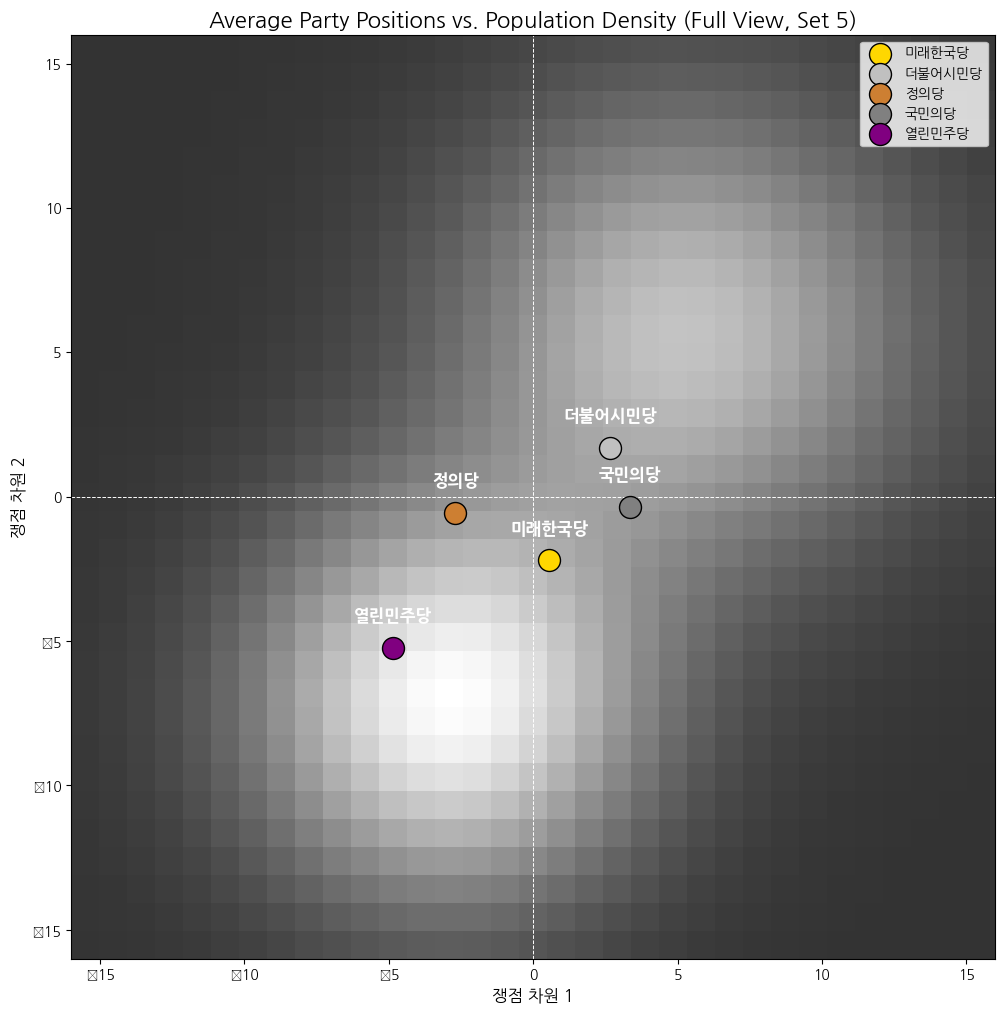

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NetLogo의 2변수 정규분포(공분산 0) PDF를 계산하는 함수
def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    if var == 0:
        var = 1e-6
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

# 1. 랭크 데이터 (df_15_... 데이터)
rank_data = {
    'rank': [1, 2, 3, 4, 5],
    'mean_xcor': [0.5623, 2.6770, -2.6934, 3.3675, -4.8645],
    'mean_ycor': [-2.2024, 1.6716, -0.5690, -0.3398, -5.2360]
}
df_ranks = pd.DataFrame(rank_data)

# 랭크 순서대로 한글 당명 매핑 (요청대로 변경)
rank_name_map = {
    1: '미래한국당',
    2: '더불어시민당',
    3: '정의당',
    4: '국민의당',
    5: '열린민주당'
}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

# 2. 인구 분포 파라미터 (param_... 데이터)
pop1_mean = (5.3633, 5.8967)
pop1_sd = 5.7800
pop2_mean = (-3.0122, -7.3367)
pop2_sd = 4.8956

# 3. NetLogo 월드 설정(-16~16, 33x33)에 맞는 그리드 생성
grid_size = 33 
x = np.linspace(-16, 16, grid_size)
y = np.linspace(-16, 16, grid_size)
X, Y = np.meshgrid(x, y)

# 4. 각 그리드 포인트에서 두 인구 집단의 밀도(Z) 계산
Z1 = bivariate_normal_pdf(X, Y, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2 = bivariate_normal_pdf(X, Y, pop2_mean[0], pop2_mean[1], pop2_sd)
Z = Z1 + Z2

# 5. 플롯 생성 (Zoomed-Out)
fig, ax = plt.subplots(figsize=(12, 12))

# 6. 배경에 밀도(Z)를 픽셀화된 이미지(히트맵)로 그리기
ax.imshow(Z, 
          cmap='gray', 
          extent=[-16, 16, -16, 16], 
          origin='lower', 
          interpolation='nearest',
          alpha=0.8) 

# 7. 그 위에 랭크 위치 시각화 (각 당을 개별적으로 그리고 레이블에 한글 이름 사용)
colors = ['gold', 'silver', '#CD7F32', 'gray', 'purple']
for i, row in df_ranks.iterrows():
    c = colors[i % len(colors)]
    ax.scatter(row['mean_xcor'], row['mean_ycor'], s=250, c=c, edgecolors='black', zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'], 
             row['mean_ycor'] + 0.8, 
             row['party_name'], 
             fontsize=12,
             ha='center', 
             va='bottom',
             color='white', 
             fontweight='bold',
             zorder=6)

# 8. 플롯 설정 (NetLogo 월드 설정에 맞게 -16 ~ +16)
ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.axvline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.set_xlim(-16, 16)
ax.set_ylim(-16, 16)
ax.set_title('Average Party Positions vs. Population Density (Full View, Set 5)', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')

# 범례 중복 제거
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# 9. 플롯 저장
plt.show()

랭크 이름을 요청하신 순서로 변경했습니다: 미래한국당, 더불어시민당, 정의당, 국민의당, 열린민주당.


C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


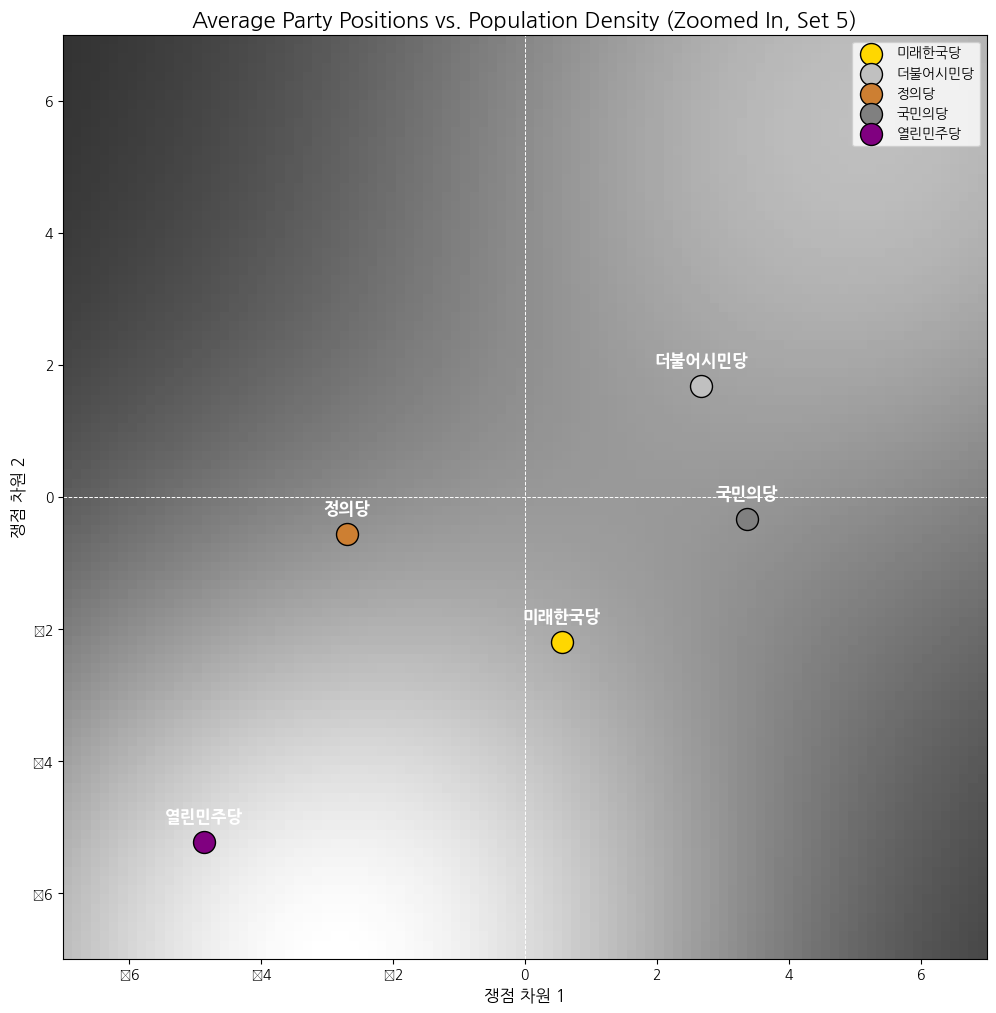

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NetLogo의 2변수 정규분포(공분산 0) PDF를 계산하는 함수
def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    if var == 0:
        var = 1e-6
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

# 1. 랭크 데이터 (df_15_... 데이터)
rank_data = {
    'rank': [1, 2, 3, 4, 5],
    'mean_xcor': [0.5623, 2.6770, -2.6934, 3.3675, -4.8645],
    'mean_ycor': [-2.2024, 1.6716, -0.5690, -0.3398, -5.2360]
}
df_ranks = pd.DataFrame(rank_data)

# 랭크 순서대로 한글 당명 매핑 요청대로 변경
rank_name_map = {
    1: '미래한국당',
    2: '더불어시민당',
    3: '정의당',
    4: '국민의당',
    5: '열린민주당'
}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

# 2. 인구 분포 파라미터 (param_... 데이터)
pop1_mean = (5.3633, 5.8967)
pop1_sd = 5.7800
pop2_mean = (-3.0122, -7.3367)
pop2_sd = 4.8956

# 3. 플롯 생성 (Zoomed-In)
fig, ax = plt.subplots(figsize=(12, 12))

# 4. 확대된 범위(-7 ~ 7)에 맞는 그리드 생성
zoom_min = -7
zoom_max = 7
grid_res = 100 
x_zoom = np.linspace(zoom_min, zoom_max, grid_res)
y_zoom = np.linspace(zoom_min, zoom_max, grid_res)
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)

# 확대된 그리드 포인트에서 밀도 계산
Z1_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop2_mean[0], pop2_mean[1], pop2_sd)
Z_zoom = Z1_zoom + Z2_zoom

# 확대된 배경에 밀도 히트맵 그리기
ax.imshow(Z_zoom, 
          cmap='gray', 
          extent=[zoom_min, zoom_max, zoom_min, zoom_max], 
          origin='lower', 
          interpolation='nearest',
          alpha=0.8) 

# 5. 랭크 위치 시각화 (각 당을 개별적으로 그리고 레이블에 한글 이름 사용)
colors = ['gold', 'silver', '#CD7F32', 'gray', 'purple']
for i, row in df_ranks.iterrows():
    c = colors[i % len(colors)]
    ax.scatter(row['mean_xcor'], row['mean_ycor'], s=250, c=c, edgecolors='black', zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'], 
             row['mean_ycor'] + 0.25, 
             row['party_name'],
             fontsize=12,
             ha='center', 
             va='bottom',
             color='white', 
             fontweight='bold',
             zorder=6)

# 7. 플롯 설정 (확대된 범위 -7 ~ +7)
ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.axvline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.set_xlim(zoom_min, zoom_max)
ax.set_ylim(zoom_min, zoom_max)
ax.set_title('Average Party Positions vs. Population Density (Zoomed In, Set 5)', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')

# 범례 중복 제거
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# 8. 플롯 저장 안내
print("랭크 이름을 요청하신 순서로 변경했습니다: 미래한국당, 더불어시민당, 정의당, 국민의당, 열린민주당.")

In [50]:
for r in (1, 2, 3, 4):
    df_name = f"df_16_rank_{r}"
    df = globals().get(df_name)
    if df is None:
        print(f"{df_name}이(가) 없습니다. 건너뜁니다.")
        continue

    print(f"\n=== Summary for {df_name} (rank={r}) ===")
    # 가능한 vote percent 컬럼 결정 (원본 df를 건드리지 않도록 복사)
    d = df.copy()
    if 'vote_pct' in d.columns:
        vote_col = 'vote_pct'
    elif 'vote_share_pct' in d.columns:
        vote_col = 'vote_share_pct'
    elif 'vote_share' in d.columns:
        d['vote_share_pct'] = d['vote_share'] * 100
        vote_col = 'vote_share_pct'
    else:
        vote_col = None

    cols_to_check = [vote_col, 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']
    cols = [c for c in cols_to_check if c and c in d.columns]

    print("사용된 컬럼:", cols)
    if cols:
        stats = d[cols].agg(['mean', 'std']).T
        print("\n평균 및 표준편차:")
        print(stats.round(4))
    else:
        print("요청한 수치 컬럼이 없습니다.")

    # species 통계
    if 'species' in d.columns:
        sp_counts = d['species'].value_counts()
        sp_pct = d['species'].value_counts(normalize=True) * 100
        sp_summary = pd.concat([sp_counts, sp_pct.round(2)], axis=1)
        sp_summary.columns = ['count', 'percent']
        print("\nSpecies 분포:")
        print(sp_summary)
    else:
        print("\n'species' 컬럼이 없습니다.")


=== Summary for df_16_rank_1 (rank=1) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean      std
vote_pct          39.1784   2.0862
phi                0.4887   0.3759
xcor              -0.6419   6.2803
ycor              -0.1226   5.6558
fitness            0.3949   0.0487
ideal_point_loss  -0.5995   0.7977
valence           60.4839  17.7771
age               10.4355   4.9538

Species 분포:
         count  percent
species                
A           33    26.61
H           25    20.16
E           24    19.35
P           23    18.55
S           19    15.32

=== Summary for df_16_rank_2 (rank=2) ===
사용된 컬럼: ['vote_pct', 'phi', 'xcor', 'ycor', 'fitness', 'ideal_point_loss', 'valence', 'age']

평균 및 표준편차:
                     mean      std
vote_pct          29.6916   1.4706
phi                0.6113   0.3405
xcor              -0.0970   6.2483
ycor               0.2557   6.3284
fitness            0.3173   0.042

In [51]:
# 통계(평균, 표준편차) 계산 (가능하면 기존 df_rank_1 사용, 없으면 df에서 rank==1으로 생성)
cols = [
    'voter-misery',
    'mean_eccentricity',
    'mean_party_policy_loss',
    'mean_party_policy_shift',
    'param_x_mean1', 'param_y_mean1', 'param_sd_1',
    'param_x_mean2', 'param_y_mean2', 'param_sd_2',
    'valence_lambda', 'campaign_ticks'
]

# source_df 결정
source_df = None
if 'df_15_rank_1' in globals():
    source_df = globals()['df_16_rank_1']
else:
    if 'df' in globals() and hasattr(globals()['df'], 'columns') and 'rank' in globals()['df'].columns:
        source_df = globals()['df'][globals()['df']['rank'] == 1].reset_index(drop=True).copy()
        globals()['df_rank_1'] = source_df
    else:
        for candidate in ('df_13', 'df_14', 'df_15', 'df_16'):
            if candidate in globals() and hasattr(globals()[candidate], 'columns') and 'rank' in globals()[candidate].columns:
                source_df = globals()[candidate][globals()[candidate]['rank'] == 1].reset_index(drop=True).copy()
                globals()['df_rank_1'] = source_df
                break

if source_df is None:
    print("df_rank_1을 찾을 수 없고, 적절한 데이터프레임에서 생성할 수 없습니다. 먼저 df_rank_1 또는 rank 컬럼을 포함한 df를 만드세요.")
else:
    available = [c for c in cols if c in source_df.columns]
    if not available:
        print("요청한 컬럼이 분석 대상 데이터프레임에 없습니다. 가능한 컬럼:", list(source_df.columns))
    else:
        means = source_df[available].mean()
        stds = source_df[available].std()
        stats = pd.DataFrame({'mean': means, 'std': stds}).round(4)
        print("평균 및 표준편차:")
        print(stats)

평균 및 표준편차:
                             mean      std
voter-misery               0.4283   0.0966
mean_eccentricity          0.9045   0.2195
mean_party_policy_loss    -0.7739   0.4074
mean_party_policy_shift    0.3216   1.0222
param_x_mean1              4.6627   2.8591
param_y_mean1              5.1206   2.7082
param_sd_1                 5.5832   1.4839
param_x_mean2             -5.0929   2.8566
param_y_mean2             -4.8038   2.9886
param_sd_2                 5.4499   1.4253
valence_lambda             0.5081   0.1560
campaign_ticks           189.5161  81.4688


랭크 이름을 국민의 미래, 더불어민주연합, 조국혁신당, 개혁신당으로 변경했습니다.


C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


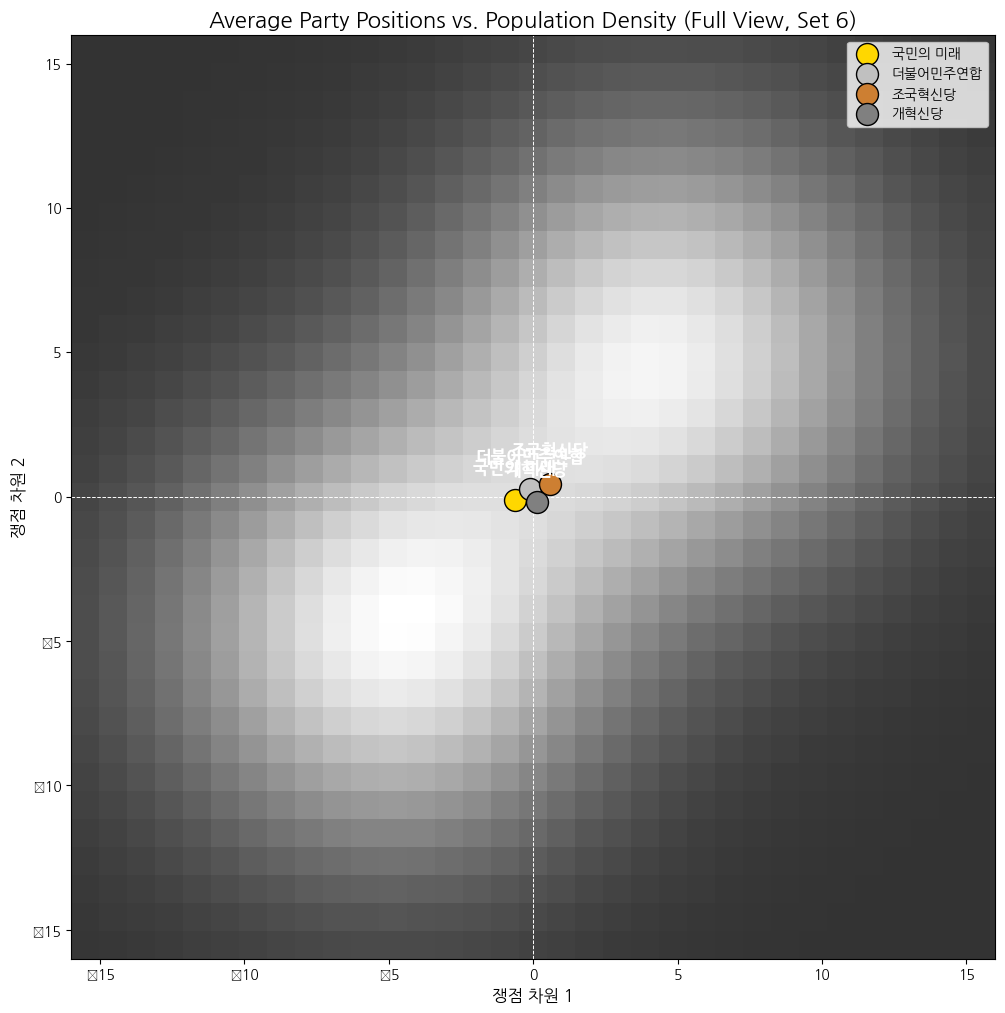

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NetLogo의 2변수 정규분포(공분산 0) PDF를 계산하는 함수
def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    if var == 0:
        var = 1e-6
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

# 1. 랭크 데이터 (df_16_... 데이터)
rank_data = {
    'rank': [1, 2, 3, 4],
    'mean_xcor': [-0.6419, -0.0970, 0.5865, 0.1232],
    'mean_ycor': [-0.1226, 0.2557, 0.4332, -0.1723]
}
df_ranks = pd.DataFrame(rank_data)

# 랭크 이름을 요청하신 순서로 변경: 1->국민의 미래, 2->더불어민주연합, 3->조국혁신당, 4->개혁신당
rank_name_map = {1: '국민의 미래', 2: '더불어민주연합', 3: '조국혁신당', 4: '개혁신당'}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

# 2. 인구 분포 파라미터 (param_... 데이터)
pop1_mean = (4.6627, 5.1206)
pop1_sd = 5.5832
pop2_mean = (-5.0929, -4.8038)
pop2_sd = 5.4499

# 3. NetLogo 월드 설정(-16~16, 33x33)에 맞는 그리드 생성
grid_size = 33 
x = np.linspace(-16, 16, grid_size)
y = np.linspace(-16, 16, grid_size)
X, Y = np.meshgrid(x, y)

# 4. 각 그리드 포인트에서 두 인구 집단의 밀도(Z) 계산
Z1 = bivariate_normal_pdf(X, Y, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2 = bivariate_normal_pdf(X, Y, pop2_mean[0], pop2_mean[1], pop2_sd)
Z = Z1 + Z2

# 5. 플롯 생성 (Zoomed-Out)
fig, ax = plt.subplots(figsize=(12, 12))

# 6. 배경에 밀도(Z)를 픽셀화된 이미지(히트맵)로 그리기
ax.imshow(Z, 
          cmap='gray', 
          extent=[-16, 16, -16, 16], 
          origin='lower', 
          interpolation='nearest',
          alpha=0.8) 

# 7. 그 위에 랭크 위치 시각화 (각 포인트에 당명 레이블)
colors = ['gold', 'silver', '#CD7F32', 'gray']
for i, row in df_ranks.iterrows():
    c = colors[i % len(colors)]
    ax.scatter(row['mean_xcor'], row['mean_ycor'], s=250, c=c, edgecolors='black', zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'], 
             row['mean_ycor'] + 0.8, 
             row['party_name'], 
             fontsize=12,
             ha='center', 
             va='bottom',
             color='white', 
             fontweight='bold',
             zorder=6)

# 8. 플롯 설정 (NetLogo 월드 설정에 맞게 -16 ~ +16)
ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.axvline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.set_xlim(-16, 16)
ax.set_ylim(-16, 16)
ax.set_title('Average Party Positions vs. Population Density (Full View, Set 6)', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')

# 범례 중복 제거
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# 9. 플롯 저장 안내
print("랭크 이름을 국민의 미래, 더불어민주연합, 조국혁신당, 개혁신당으로 변경했습니다.")

랭크 이름을 국민의 미래, 더불어민주연합, 조국혁신당, 개혁신당으로 변경했습니다. Zoomed-in plot (Set 6) 표시 완료.


C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\jihun\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


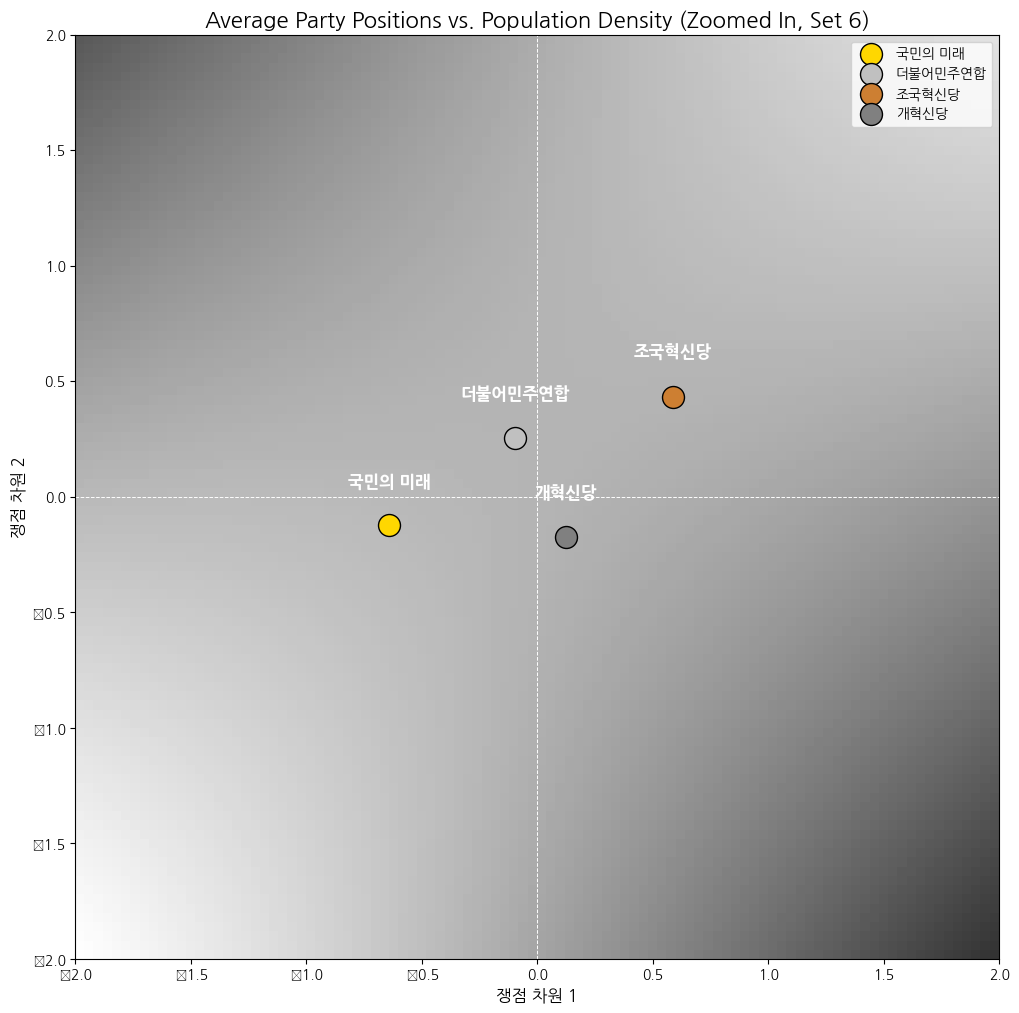

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NetLogo의 2변수 정규분포(공분산 0) PDF를 계산하는 함수
def bivariate_normal_pdf(x, y, mean_x, mean_y, sd):
    var = sd**2
    if var == 0:
        var = 1e-6
    x1_sq = ((x - mean_x) / sd)**2
    y1_sq = ((y - mean_y) / sd)**2
    norm_factor = 1 / (2 * np.pi * var)
    return norm_factor * np.exp(-0.5 * (x1_sq + y1_sq))

# 1. 랭크 데이터 (df_16_... 데이터)
rank_data = {
    'rank': [1, 2, 3, 4],
    'mean_xcor': [-0.6419, -0.0970, 0.5865, 0.1232],
    'mean_ycor': [-0.1226, 0.2557, 0.4332, -0.1723]
}
df_ranks = pd.DataFrame(rank_data)

# 2. 인구 분포 파라미터 (param_... 데이터)
pop1_mean = (4.6627, 5.1206)
pop1_sd = 5.5832
pop2_mean = (-5.0929, -4.8038)
pop2_sd = 5.4499

# 랭크 이름을 요청하신 순서로 변경: 국민의 미래, 더불어민주연합, 조국혁신당, 개혁신당
rank_name_map = {1: '국민의 미래', 2: '더불어민주연합', 3: '조국혁신당', 4: '개혁신당'}
df_ranks['party_name'] = df_ranks['rank'].map(rank_name_map)

# 3. 플롯 생성 (Zoomed-In)
fig, ax = plt.subplots(figsize=(12, 12))

# 4. 확대된 범위(-2 ~ 2)에 맞는 그리드 생성
zoom_min = -2
zoom_max = 2
grid_res = 100 
x_zoom = np.linspace(zoom_min, zoom_max, grid_res)
y_zoom = np.linspace(zoom_min, zoom_max, grid_res)
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)

# 확대된 그리드 포인트에서 밀도 계산
Z1_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop1_mean[0], pop1_mean[1], pop1_sd)
Z2_zoom = bivariate_normal_pdf(X_zoom, Y_zoom, pop2_mean[0], pop2_mean[1], pop2_sd)
Z_zoom = Z1_zoom + Z2_zoom

# 확대된 배경에 밀도 히트맵 그리기
ax.imshow(Z_zoom, 
          cmap='gray', 
          extent=[zoom_min, zoom_max, zoom_min, zoom_max], 
          origin='lower', 
          interpolation='nearest',
          alpha=0.8) 

# 5. 랭크 위치 시각화 (각 당을 개별적으로 그리고 범례에 당명 사용)
colors = ['gold', 'silver', '#CD7F32', 'gray']
for i, row in df_ranks.iterrows():
    c = colors[i % len(colors)]
    ax.scatter(row['mean_xcor'], row['mean_ycor'], s=250, c=c, edgecolors='black', zorder=5, label=row['party_name'])
    ax.text(row['mean_xcor'], 
            row['mean_ycor'] + 0.15,
            row['party_name'],
            fontsize=12,
            ha='center', 
            va='bottom',
            color='white', 
            fontweight='bold',
            zorder=6)

# 7. 플롯 설정 (확대된 범위 -2 ~ +2)
ax.axhline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.axvline(0, color='white', linestyle='--', linewidth=0.7, zorder=1)
ax.set_xlim(zoom_min, zoom_max)
ax.set_ylim(zoom_min, zoom_max)
ax.set_title('Average Party Positions vs. Population Density (Zoomed In, Set 6)', fontsize=16)
ax.set_xlabel('쟁점 차원 1', fontsize=12)
ax.set_ylabel('쟁점 차원 2', fontsize=12)
ax.set_aspect('equal', adjustable='box')

# 범례 중복 제거
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# 8. 플롯 저장 안내
print("랭크 이름을 국민의 미래, 더불어민주연합, 조국혁신당, 개혁신당으로 변경했습니다. Zoomed-in plot (Set 6) 표시 완료.")